### 🔢 Celda 0 – Reinicio de proyecto: respaldo y limpieza de outputs previos

Esta celda crea un respaldo automático de los contenidos previos de `images/`, `results/` y `logs/` en un archivo `.zip` dentro de `backups/`, y limpia esas carpetas para dejar el entorno listo para una nueva corrida.


In [1]:
# ✅ Celda 0: Respaldo y limpieza de outputs previos

from scripts.utils import respaldar_y_limpiar_directorios

# Directorios a respaldar y limpiar
#dirs_a_respaldar = ['images ', 'results', 'logs']
#respaldar_y_limpiar_directorios(dirs_a_respaldar)

respaldar_y_limpiar_directorios(['images', 'results', 'logs'])



✅ Backup creado: backups\backup_20250616_011619.zip


> ✅ **Resultado esperado**: Los archivos previos en `images/`, `results/` y `logs/` se comprimen en un .zip con timestamp en la carpeta `backups/`. Las carpetas quedan vacías para iniciar una nueva corrida.


### 🔢 Celda 1 – Configuración inicial del entorno

Esta celda verifica la versión de Python y se asegura de que las carpetas necesarias para el proyecto estén creadas. Esta estructura es fundamental para el correcto funcionamiento del flujo completo.


In [2]:
# ✅ Celda 1: Setup inicial del entorno del proyecto

import sys
import os

# Mostrar versión de Python
print("✅ Versión de Python:", sys.version)

# Lista de carpetas base del proyecto
base_dirs = [
    "data", "scripts", "checkpoints", "results", "images", "logs", "backups"
]

# Crear carpetas si no existen
for d in base_dirs:
    os.makedirs(d, exist_ok=True)
    print(f"📁 Carpeta creada/verificada: {d}")


✅ Versión de Python: 3.11.11 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:34:19) [MSC v.1929 64 bit (AMD64)]
📁 Carpeta creada/verificada: data
📁 Carpeta creada/verificada: scripts
📁 Carpeta creada/verificada: checkpoints
📁 Carpeta creada/verificada: results
📁 Carpeta creada/verificada: images
📁 Carpeta creada/verificada: logs
📁 Carpeta creada/verificada: backups


### 🔢 Celda 2 – Carga y exploración del dataset `.npz`

En esta celda se carga el archivo `mel_fwod_dataset.npz`, que contiene:
- `X`: espectrogramas Mel
- `y`: vector objetivo asociado
- `meta`: información adicional por muestra

Se imprimen las dimensiones del dataset y se explora el campo `style` en `meta`, con el objetivo de identificar cuántas clases distintas de estilo musical existen en el dataset.


In [3]:
# ✅ Celda 2 (versión debug): inspeccionar claves reales del .npz

import numpy as np

# Ruta del archivo
dataset_path = './data/mel_fwod_dataset.npz'

# Cargar el archivo
data = np.load(dataset_path, allow_pickle=True)

# Mostrar claves reales
print("🔑 Claves disponibles en el archivo .npz:")
for key in data.keys():
    print(f" - {key}")


🔑 Claves disponibles en el archivo .npz:
 - mel
 - fwod
 - meta


In [4]:
# ✅ Celda 2 (debug): Verificar estructura de 'meta'

meta_raw = data['meta']  # sin .item()

print("📦 Tipo de 'meta':", type(meta_raw))
print("🧱 Shape de 'meta':", getattr(meta_raw, 'shape', 'No aplica'))
print("\n🔍 Primeros elementos:")
print(meta_raw)


📦 Tipo de 'meta': <class 'numpy.ndarray'>
🧱 Shape de 'meta': (16539,)

🔍 Primeros elementos:
[{'drummer': 'drummer1', 'style': 'funk/groove1', 'session': 'drummer1/eval_session', 'bpm_orig': 138.0, 'filename': 'drummer1/eval_session/1_funk-groove1_138_beat_4-4.wav', 'bar_index': 0}
 {'drummer': 'drummer1', 'style': 'funk/groove1', 'session': 'drummer1/eval_session', 'bpm_orig': 138.0, 'filename': 'drummer1/eval_session/1_funk-groove1_138_beat_4-4.wav', 'bar_index': 1}
 {'drummer': 'drummer1', 'style': 'funk/groove1', 'session': 'drummer1/eval_session', 'bpm_orig': 138.0, 'filename': 'drummer1/eval_session/1_funk-groove1_138_beat_4-4.wav', 'bar_index': 2}
 ...
 {'drummer': 'drummer9', 'style': 'rock', 'session': 'drummer9/session1', 'bpm_orig': 100.0, 'filename': 'drummer9/session1/9_rock_100_beat_4-4.wav', 'bar_index': 1}
 {'drummer': 'drummer9', 'style': 'rock', 'session': 'drummer9/session1', 'bpm_orig': 100.0, 'filename': 'drummer9/session1/9_rock_100_beat_4-4.wav', 'bar_index': 2}


In [5]:
# ✅ Celda 2: Cargar y explorar el dataset MEL (versión final)

import numpy as np
from collections import Counter

# Ruta del archivo
dataset_path = './data/mel_fwod_dataset.npz'

# Cargar el archivo .npz
data = np.load(dataset_path, allow_pickle=True)

# Extraer contenidos correctos
X = data['mel']
meta = data['meta']  # Ya es un ndarray de dicts

# Confirmar dimensiones de X
print(f"📐 mel shape (X): {X.shape}")
print(f"📦 meta shape: {meta.shape}")

# Obtener estilos de todas las muestras
styles = [entry['style'] for entry in meta]
style_counts = Counter(styles)

# Mostrar clases disponibles
print("\n🎼 Estilos musicales encontrados:")
for style, count in style_counts.items():
    print(f"  - {style}: {count} muestras")

print(f"\n🎯 Total de estilos distintos: {len(style_counts)}")


📐 mel shape (X): (16539, 128, 16)
📦 meta shape: (16539,)

🎼 Estilos musicales encontrados:
  - funk/groove1: 52 muestras
  - soul/groove10: 64 muestras
  - funk/groove2: 64 muestras
  - soul/groove3: 64 muestras
  - soul/groove4: 64 muestras
  - funk/groove5: 64 muestras
  - hiphop/groove6: 64 muestras
  - pop/groove7: 52 muestras
  - rock/groove8: 64 muestras
  - soul/groove9: 64 muestras
  - funk: 1369 muestras
  - jazz/funk: 136 muestras
  - neworleans/secondline: 212 muestras
  - dance/disco: 244 muestras
  - funk/fast: 86 muestras
  - latin/brazilian-baiao: 229 muestras
  - afrocuban: 275 muestras
  - reggae: 247 muestras
  - reggae/slow: 29 muestras
  - rock/halftime: 116 muestras
  - funk/purdieshuffle: 102 muestras
  - latin/samba: 153 muestras
  - jazz: 667 muestras
  - rock/shuffle: 221 muestras
  - jazz/mediumfast: 78 muestras
  - jazz/fast: 53 muestras
  - latin/reggaeton: 32 muestras
  - dance/breakbeat: 82 muestras
  - neworleans/funk: 341 muestras
  - latin/chacarera: 18

---

### 📌 Comentarios del Paso 2: Exploración inicial del dataset

Tras cargar el archivo `mel_fwod_dataset.npz`, se obtuvieron los siguientes resultados clave:

- El dataset contiene **16,539 muestras**
- Cada muestra es un espectrograma Mel con dimensiones `(128, 16)` (frecuencia × tiempo)
- La información contextual se encuentra en el campo `meta`, con un diccionario por muestra
- Se identificaron **74 estilos musicales únicos** en la columna `style`

#### 🎯 Observaciones importantes

- Existen estilos con una gran cantidad de muestras (e.g. `rock: 3625`)
- Algunos estilos tienen muy pocas muestras (e.g. `latin/merengue: 9`)
- Esto sugiere que **la distribución de clases está desbalanceada**, lo que podría afectar el entrenamiento del modelo de clasificación

#### 💡 Recomendaciones

- Considerar técnicas de *balanceo de clases* (ponderación, reagrupación, o eliminación de clases muy pequeñas)
- Evaluar si conviene reducir la cantidad de clases fusionando estilos similares
- Guardar esta estadística en un archivo CSV para referencia futura

Este análisis nos permite comprender mejor los desafíos de la tarea de clasificación y guiar decisiones de preprocesamiento en pasos posteriores.


### 🔢 Celda 3 – Visualización de la distribución de estilos

Esta celda utiliza la función `guardar_distribucion_estilos` desde `scripts/utils.py` para:
- Crear un gráfico de barras con la cantidad de muestras por estilo musical
- Guardar esta distribución en dos formatos:
  - Un archivo `.csv` con la tabla de conteo (`results/style_distribution.csv`)
  - Una imagen `.png` del gráfico (`images/distribucion_estilos.png`)


📁 Archivo CSV guardado en: results/style_distribution.csv
🖼️ Imagen guardada en: images/distribucion_estilos.png


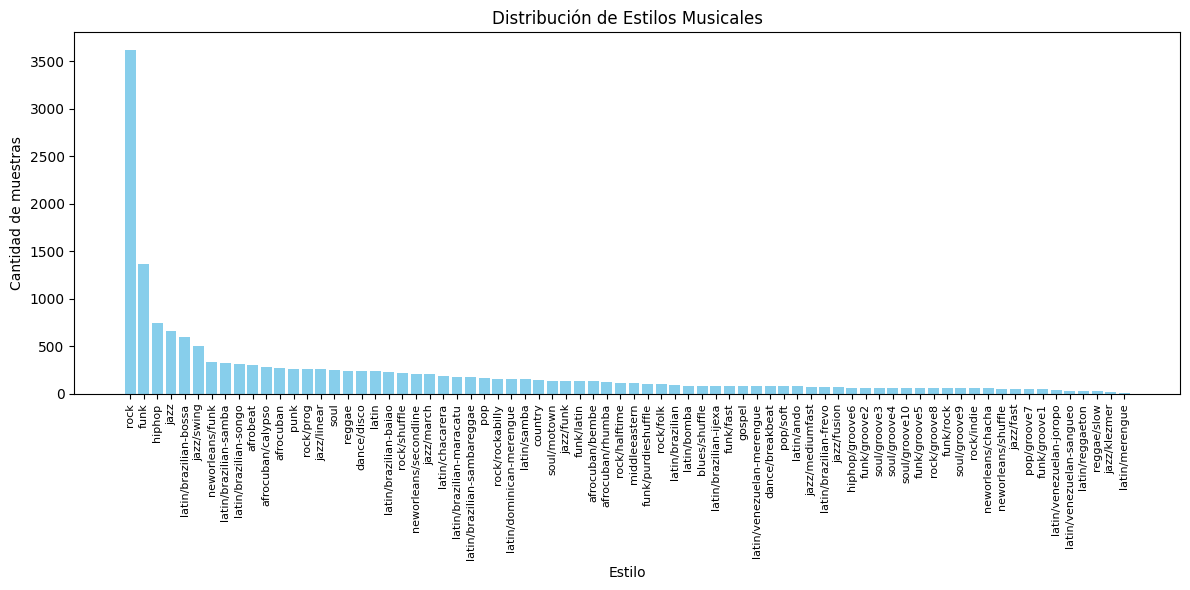

In [6]:
# ✅ Celda 3: Visualizar y guardar distribución de estilos (con visualización en notebook)

from scripts.utils import guardar_distribucion_estilos

# Llamada con visualización activa
guardar_distribucion_estilos(style_counts, mostrar_en_notebook=True)


### 🔢 Celda 4 – Visualización de una muestra individual

Esta celda permite inspeccionar una muestra específica del dataset, mostrando:
- Su espectrograma Mel en formato de imagen
- Su clase `style` (etiqueta objetivo)

Esto es útil para validar visualmente las características del input del modelo.


🎵 Estilo: jazz/march
🎛️  Índice de muestra: 3648
🎧 Mel shape: (128, 16)


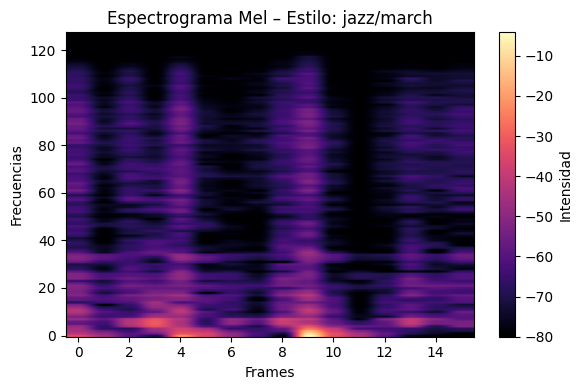

In [7]:
# ✅ Celda 4: Visualizar espectrograma Mel de una muestra aleatoria

import matplotlib.pyplot as plt
import random

# Usar semilla global para consistencia
random.seed(42)

# Seleccionar un índice aleatorio
idx = random.randint(0, len(X) - 1)
mel_sample = X[idx]
style_sample = meta[idx]['style']

# Mostrar información
print(f"🎵 Estilo: {style_sample}")
print(f"🎛️  Índice de muestra: {idx}")
print(f"🎧 Mel shape: {mel_sample.shape}")

# Graficar espectrograma
plt.figure(figsize=(6, 4))
plt.imshow(mel_sample, aspect='auto', origin='lower', cmap='magma')
plt.colorbar(label='Intensidad')
plt.title(f"Espectrograma Mel – Estilo: {style_sample}")
plt.xlabel("Frames")
plt.ylabel("Frecuencias")
plt.tight_layout()
plt.show()


### 🔢 Celda 5 – Comparar múltiples muestras del mismo estilo

Esta celda selecciona varias muestras aleatorias de un mismo estilo musical y muestra sus espectrogramas Mel en una cuadrícula. Esto permite visualizar la variabilidad intra-clase y detectar patrones consistentes o diferencias entre interpretaciones.


🔎 3625 muestras con estilo 'rock'


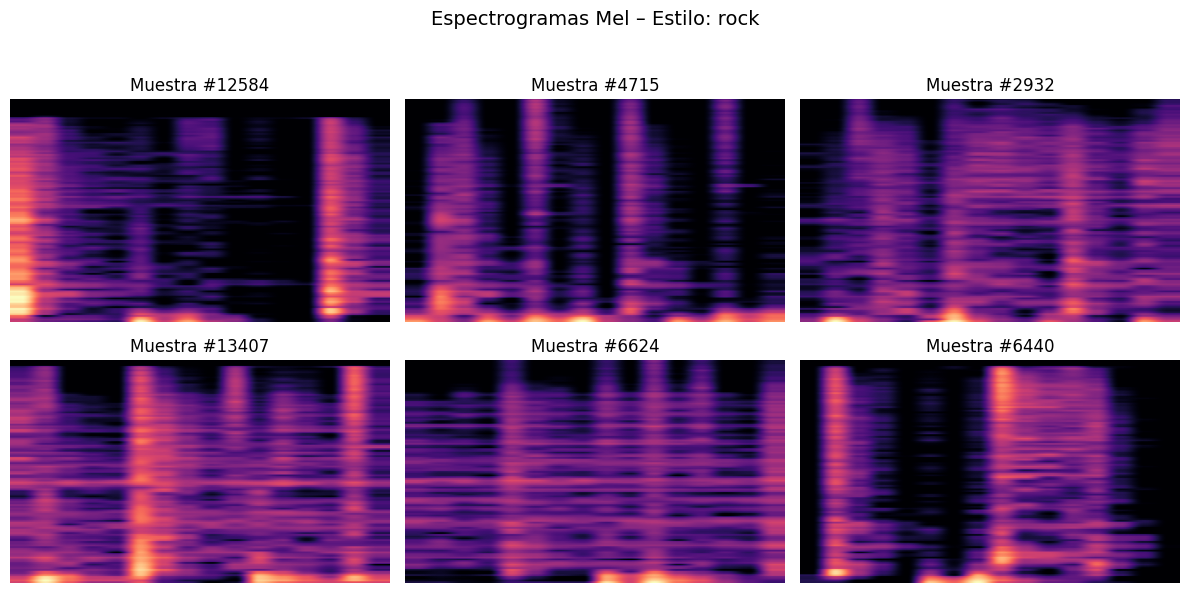

In [8]:
# ✅ Celda 5: Mostrar varios espectrogramas de un mismo estilo

import numpy as np
import matplotlib.pyplot as plt

# Estilo a comparar (puedes cambiarlo por cualquier otro de la lista)
estilo_objetivo = 'rock'

# Obtener índices donde el estilo coincide
indices = [i for i, m in enumerate(meta) if m['style'] == estilo_objetivo]

# Ver cuántas muestras hay disponibles
print(f"🔎 {len(indices)} muestras con estilo '{estilo_objetivo}'")

# Elegir 6 muestras aleatorias de ese estilo (si hay al menos 6)
random.seed(42)
ejemplos = random.sample(indices, min(6, len(indices)))

# Graficar los espectrogramas
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle(f"Espectrogramas Mel – Estilo: {estilo_objetivo}", fontsize=14)

for i, idx in enumerate(ejemplos):
    row, col = divmod(i, 3)
    axes[row, col].imshow(X[idx], aspect='auto', origin='lower', cmap='magma')
    axes[row, col].set_title(f"Muestra #{idx}")
    axes[row, col].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### 🔢 Celda 6 – Análisis de los campos en `meta`

En esta celda exploramos la información adicional por muestra contenida en el campo `meta`, como:
- `drummer`
- `bpm_orig`
- `session`
- `bar_index`

El objetivo es entender la distribución de estos campos y determinar si pueden usarse como features adicionales para mejorar la predicción del estilo musical.


,drummer,style,session,bpm_orig,filename,bar_index
0,drummer1,funk/groove1,drummer1/eval_session,138.0,drummer1/eval_session/1_funk-groove1_138_beat_...,0
1,drummer1,funk/groove1,drummer1/eval_session,138.0,drummer1/eval_session/1_funk-groove1_138_beat_...,1
2,drummer1,funk/groove1,drummer1/eval_session,138.0,drummer1/eval_session/1_funk-groove1_138_beat_...,2
3,drummer1,funk/groove1,drummer1/eval_session,138.0,drummer1/eval_session/1_funk-groove1_138_beat_...,3
4,drummer1,funk/groove1,drummer1/eval_session,138.0,drummer1/eval_session/1_funk-groove1_138_beat_...,4


📊 Columnas en meta: ['drummer', 'style', 'session', 'bpm_orig', 'filename', 'bar_index']

🔢 Drummers únicos: 9
🎵 Sesiones únicas: 21
🖼️ Imagen guardada en: images/hist_bpm_orig.png


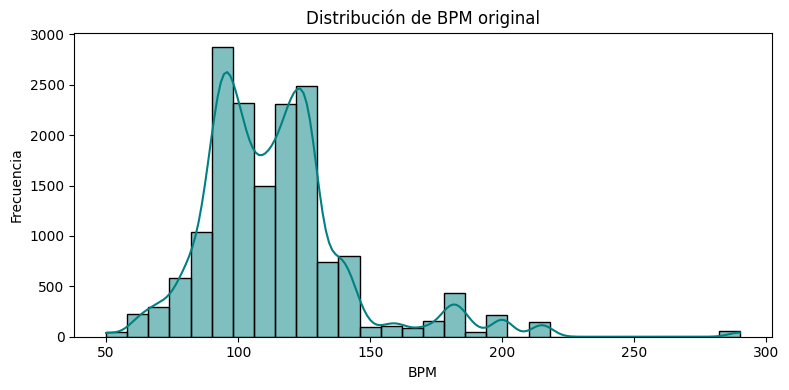

In [9]:
# ✅ Celda 6: Análisis de campos del meta y guardado de gráfico

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scripts.utils import guardar_y_mostrar_figura  # Si tienes esta función en utils.py

# Convertir el meta a un DataFrame
meta_df = pd.DataFrame(meta.tolist())

# Mostrar las primeras filas
display(meta_df.head())

# Mostrar información general
print("📊 Columnas en meta:", meta_df.columns.tolist())
print("\n🔢 Drummers únicos:", meta_df['drummer'].nunique())
print("🎵 Sesiones únicas:", meta_df['session'].nunique())

# Distribución de BPM
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(meta_df['bpm_orig'], bins=30, kde=True, color='teal', ax=ax)
ax.set_title("Distribución de BPM original")
ax.set_xlabel("BPM")
ax.set_ylabel("Frecuencia")
plt.tight_layout()

# Guardar y mostrar
guardar_y_mostrar_figura(fig, 'images/hist_bpm_orig.png')


> ✅ **Resultado esperado**: Se construyó un histograma de los valores de `bpm_orig` que muestra la distribución de tempo original en las muestras del dataset. 
>
> 🧠 **Observaciones**:
> - La mayoría de los BPM se concentran entre 90 y 140.
> - Hay varios picos secundarios que podrían estar asociados a diferentes estilos o bateristas.
> - Este campo puede ser útil como *feature adicional* para los modelos, ya que puede influir en la percepción del estilo rítmico.


### 🔢 Celda 7 – Resumen de `meta` y exportación a CSV

Esta celda genera un resumen estadístico de los campos contenidos en `meta` (como `bpm_orig`, `drummer`, `session`, etc.) y los guarda como archivo `.csv` para su análisis futuro. Esta operación se encapsula en una función reutilizable para integrarla fácilmente en otros notebooks.


In [10]:
# ✅ Celda 7: Generar, mostrar y guardar resumen de campos de `meta`

from scripts.utils import guardar_resumen_meta

# Ejecutar la función
guardar_resumen_meta(meta, mostrar_en_notebook=True)


📄 Resumen guardado en: results/meta_summary.csv


,Campo,Valores únicos,Tipo de dato,Muestras no nulas
0,drummer,9,object,16539
1,style,74,object,16539
2,session,21,object,16539
3,bpm_orig,73,float64,16539
4,filename,1004,object,16539
5,bar_index,306,int64,16539



📋 Resumen en formato Markdown:

| Campo     |   Valores únicos | Tipo de dato   |   Muestras no nulas |
|:----------|-----------------:|:---------------|--------------------:|
| drummer   |                9 | object         |               16539 |
| style     |               74 | object         |               16539 |
| session   |               21 | object         |               16539 |
| bpm_orig  |               73 | float64        |               16539 |
| filename  |             1004 | object         |               16539 |
| bar_index |              306 | int64          |               16539 |


> ✅ **Resultado esperado**: 
> 
> Se generó un resumen estadístico de los campos de `meta` y se exportó en el archivo `results/meta_summary.csv`. 
> El resumen mostró:
>
> | Campo       | Valores únicos | Observaciones |
> |-------------|----------------|---------------|
> | `drummer`   | 9               | Diversidad de bateristas; útil para analizar posibles sesgos o como feature |
> | `style`     | 74              | Tarea multiclase con alta complejidad |
> | `session`   | 21              | Posible agrupador para validación cruzada o feature adicional |
> | `bpm_orig`  | 73              | Campo continuo que podría ser útil como feature para la predicción |
> | `filename`  | 1004            | Múltiples compases por archivo, confirmando la granularidad de las muestras |
> | `bar_index` | 306             | Índice de compás que podría servir para análisis temporal si se desea |
> 
> Este análisis confirma que el campo `meta` contiene información rica y potencialmente valiosa para la predicción del estilo musical. Se recomienda considerar la incorporación de estos campos como variables adicionales en las futuras arquitecturas del modelo.


### 🔢 Celda 8 – Relación entre BPM original y estilo musical

Esta celda construye un boxplot que muestra la distribución de `bpm_orig` para los distintos estilos musicales (`style`). 
El objetivo es visualizar si existen estilos asociados a rangos de tempo específicos, lo que podría indicar la utilidad de `bpm_orig` como feature para el modelo.


🖼️ Imagen guardada en: images/boxplot_bpm_por_estilo.png


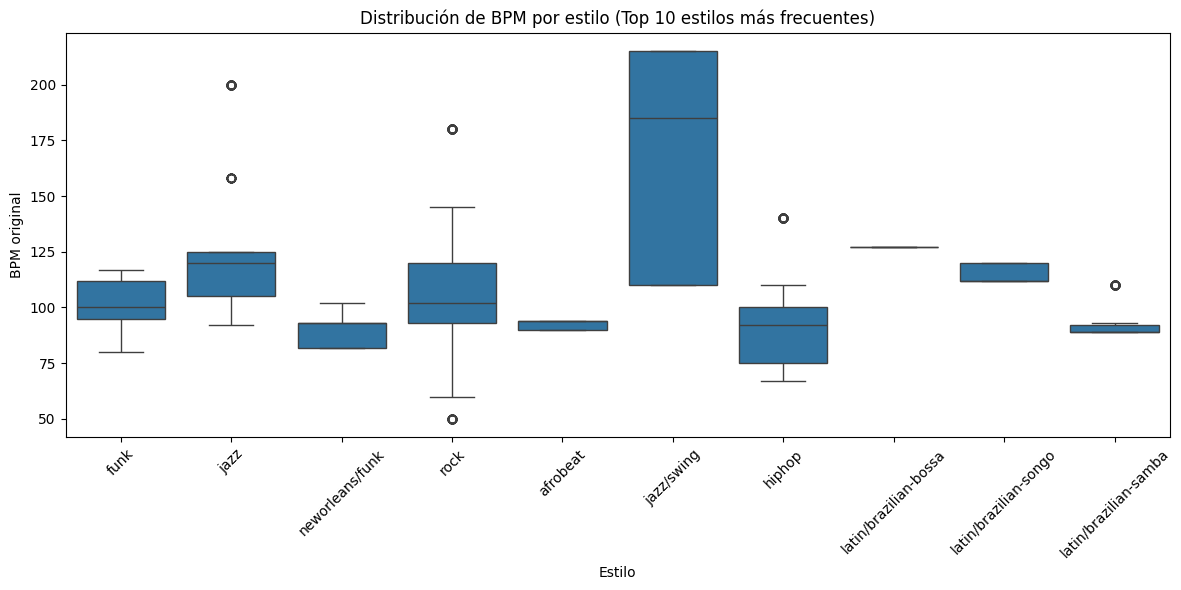

In [11]:
# ✅ Celda 8: Boxplot de bpm_orig por estilo (con guardado automático)

import seaborn as sns
import matplotlib.pyplot as plt
from scripts.utils import guardar_y_mostrar_figura  # Si ya lo tienes en utils.py

# Limitar a los N estilos más frecuentes para mayor legibilidad
N = 10
top_styles = meta_df['style'].value_counts().head(N).index

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=meta_df[meta_df['style'].isin(top_styles)], x='style', y='bpm_orig', ax=ax)
ax.set_title(f"Distribución de BPM por estilo (Top {N} estilos más frecuentes)")
ax.set_xlabel("Estilo")
ax.set_ylabel("BPM original")
plt.xticks(rotation=45)
plt.tight_layout()

# Guardar y mostrar
guardar_y_mostrar_figura(fig, 'images/boxplot_bpm_por_estilo.png')


> ✅ **Resultado esperado**: Se generó un boxplot que muestra la distribución de los BPM originales (`bpm_orig`) por estilo musical, limitado a los 10 estilos más frecuentes del dataset.
> 
> 🧠 **Observaciones**:
> - Algunos estilos presentan rangos de tempo bastante definidos (por ejemplo, `afrobeat` o `latin/brazilian-bossa`).
> - Otros estilos muestran mayor variabilidad de BPM (por ejemplo, `jazz/swing` o `rock`).
> - Esto sugiere que `bpm_orig` podría ser un *feature* útil para la clasificación, pero con diferente nivel de aportación según el estilo.


### 🔢 Celda 9 – Conteo de muestras por baterista

Esta celda genera un gráfico de barras que muestra la cantidad de muestras aportadas por cada baterista (`drummer`).
El gráfico se guarda automáticamente en `images/barplot_muestras_por_drummer.png` y se muestra en el notebook.


🖼️ Imagen guardada en: images/barplot_muestras_por_drummer.png


C:\Users\apont\AppData\Local\Temp\ipykernel_8004\403661095.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=counts, x='drummer', y='count', palette='viridis', ax=ax)


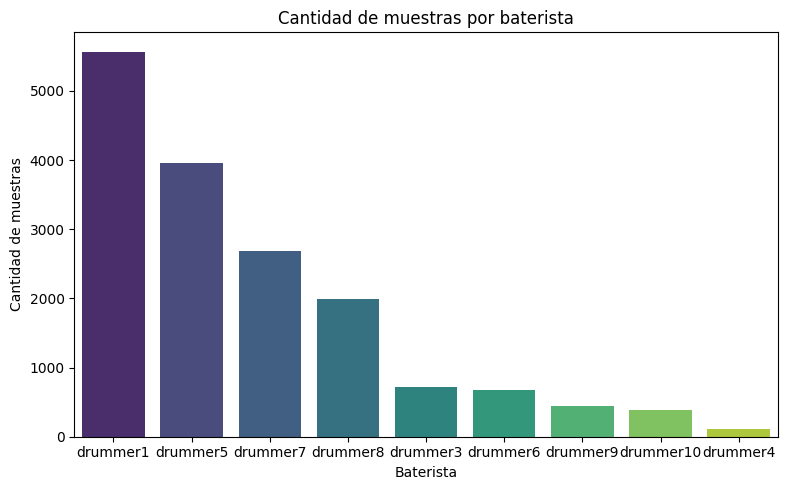

In [12]:
# ✅ Celda 9: Gráfico de barras de muestras por baterista

def crear_barplot_muestras_por_drummer(meta_df, path_img='images/barplot_muestras_por_drummer.png'):
    """
    Genera un barplot con el conteo de muestras por baterista y lo guarda.

    Parámetros:
    - meta_df (DataFrame): DataFrame con los metadatos
    - path_img (str): ruta para guardar la imagen
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scripts.utils import guardar_y_mostrar_figura

    counts = meta_df['drummer'].value_counts().reset_index()
    counts.columns = ['drummer', 'count']

    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(data=counts, x='drummer', y='count', palette='viridis', ax=ax)
    ax.set_title("Cantidad de muestras por baterista")
    ax.set_xlabel("Baterista")
    ax.set_ylabel("Cantidad de muestras")
    plt.tight_layout()

    guardar_y_mostrar_figura(fig, path_img)

# Ejecutar
crear_barplot_muestras_por_drummer(meta_df)


> ✅ **Resultado esperado**: 
> 
> Se generó un gráfico de barras con la cantidad de muestras aportadas por cada baterista. 
> 
> 🧠 **Observaciones**:
> - `drummer1` y `drummer5` aportan la mayor cantidad de muestras, lo que podría generar un sesgo en el entrenamiento si no se controla.
> - Los bateristas con menos muestras (como `drummer4`) podrían necesitar un tratamiento especial (e.g. ponderación, agrupación o data augmentation).


### 🔢 Celda 10 – Boxplot de BPM por baterista

Esta celda genera un boxplot que muestra la distribución del tempo original (`bpm_orig`) por cada baterista (`drummer`).
La imagen se guarda automáticamente en `images/boxplot_bpm_por_drummer.png` y se muestra en el notebook.


C:\Users\apont\AppData\Local\Temp\ipykernel_8004\123588516.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=meta_df, x='drummer', y='bpm_orig', palette='Set2', ax=ax)


🖼️ Imagen guardada en: images/boxplot_bpm_por_drummer.png


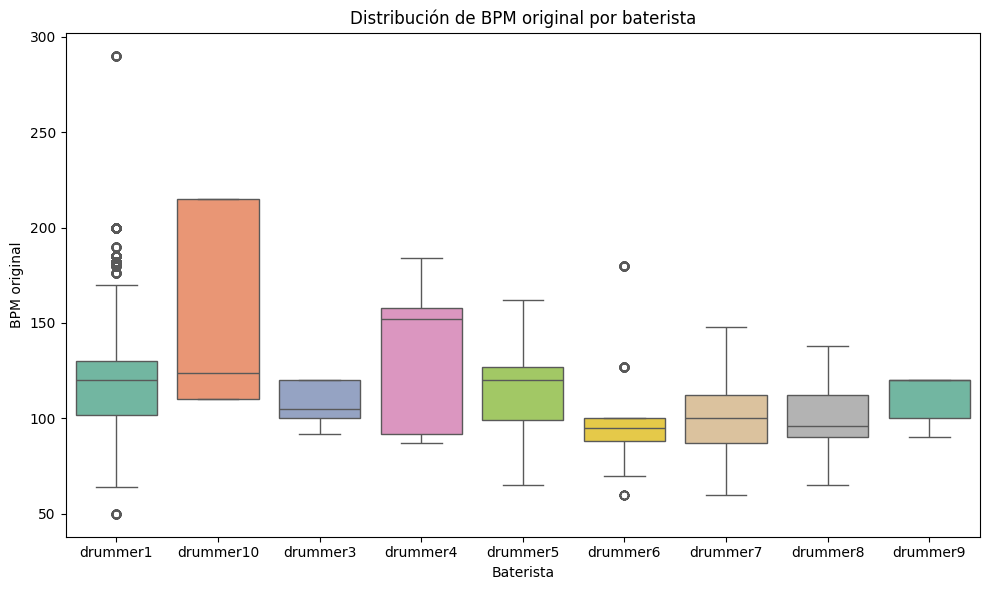

In [13]:
# ✅ Celda 10: Boxplot BPM por baterista con guardado automático

def crear_boxplot_bpm_por_drummer(meta_df, path_img='images/boxplot_bpm_por_drummer.png'):
    """
    Genera un boxplot de BPM por baterista y lo guarda.

    Parámetros:
    - meta_df (DataFrame): DataFrame con los metadatos
    - path_img (str): ruta para guardar la imagen
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scripts.utils import guardar_y_mostrar_figura

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(data=meta_df, x='drummer', y='bpm_orig', palette='Set2', ax=ax)
    ax.set_title("Distribución de BPM original por baterista")
    ax.set_xlabel("Baterista")
    ax.set_ylabel("BPM original")
    plt.tight_layout()

    guardar_y_mostrar_figura(fig, path_img)

# Ejecutar
crear_boxplot_bpm_por_drummer(meta_df)


> ✅ **Resultado esperado**: 
> 
> Se generó un boxplot que muestra la distribución de `bpm_orig` por baterista.
> 
> 🧠 **Observaciones**:
> - Se observan bateristas con rangos de BPM más amplios (por ejemplo, `drummer1` y `drummer10`) y otros con rangos más consistentes.
> - Esto puede indicar que algunos bateristas trabajaron con estilos más variados o tempos más flexibles.
> - El BPM original podría ser un feature relevante, pero habría que controlar la correlación con el baterista para evitar sesgos.


### 🔢 Celda 11 – Heatmap de correlación entre campos numéricos

Esta celda genera un mapa de calor (heatmap) con las correlaciones entre los campos numéricos de `meta`.
El gráfico se guarda automáticamente en `images/heatmap_correlacion_meta.png` y se muestra en el notebook.


🖼️ Imagen guardada en: images/heatmap_correlacion_meta.png


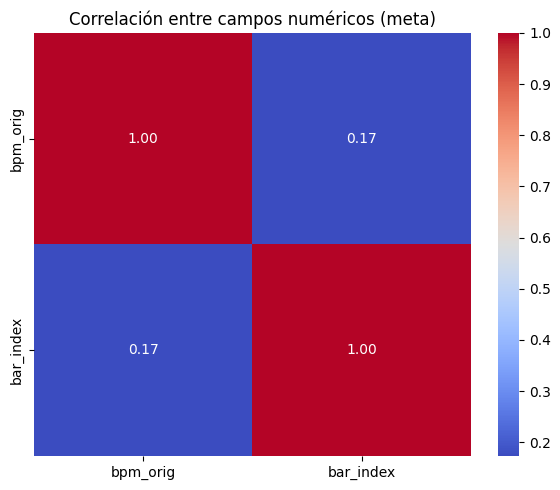

In [14]:
# ✅ Celda 11: Heatmap de correlación de campos numéricos

def crear_heatmap_correlacion_meta(meta_df, path_img='images/heatmap_correlacion_meta.png'):
    """
    Genera un heatmap de correlación entre los campos numéricos de meta y lo guarda.

    Parámetros:
    - meta_df (DataFrame): DataFrame con los metadatos
    - path_img (str): ruta para guardar la imagen
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scripts.utils import guardar_y_mostrar_figura

    df_num = meta_df.select_dtypes(include=['float64', 'int64'])
    corr = df_num.corr()

    fig, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', ax=ax)
    ax.set_title("Correlación entre campos numéricos (meta)")
    plt.tight_layout()

    guardar_y_mostrar_figura(fig, path_img)

# Ejecutar
crear_heatmap_correlacion_meta(meta_df)


> ✅ **Resultado esperado**: 
> 
> Se generó un heatmap de correlación entre los campos numéricos de `meta`. 
> 
> 🧠 **Observaciones**:
> - La correlación entre `bpm_orig` y `bar_index` es baja (0.17), lo que indica que son campos independientes en el dataset.
> - Esto sugiere que ambos podrían usarse como features sin riesgo de multicolinealidad directa.


### 🔢 Celda 12 – Pairplot de BPM, bar index y estilo

Esta celda genera un pairplot para visualizar la relación entre `bpm_orig`, `bar_index` y `style` (limitado a los 5 estilos más frecuentes para mayor legibilidad).
La imagen se guarda automáticamente en `images/pairplot_bpm_barindex_style.png` y se muestra en el notebook.


🖼️ Imagen guardada en: images/pairplot_bpm_barindex_style.png


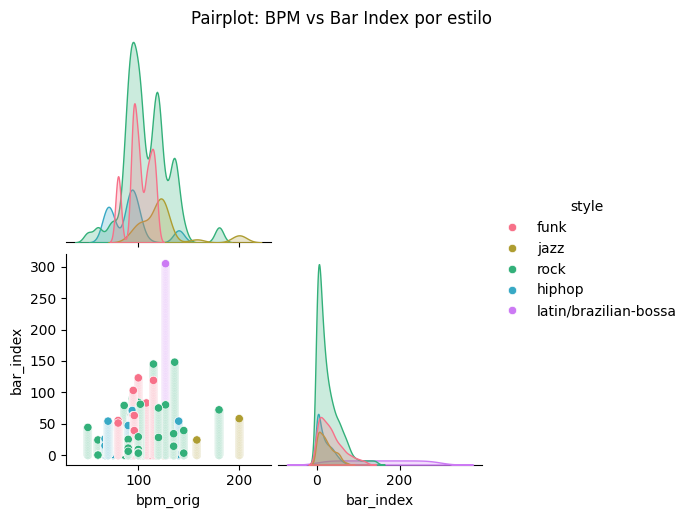

In [15]:
# ✅ Celda 12: Pairplot de campos numéricos y estilo

def crear_pairplot_bpm_barindex_style(meta_df, path_img='images/pairplot_bpm_barindex_style.png', top_n_styles=5):
    """
    Genera un pairplot entre bpm_orig, bar_index y style (top N estilos) y lo guarda.

    Parámetros:
    - meta_df (DataFrame): DataFrame con los metadatos
    - path_img (str): ruta para guardar la imagen
    - top_n_styles (int): número de estilos más frecuentes a considerar
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scripts.utils import guardar_y_mostrar_figura

    top_styles = meta_df['style'].value_counts().head(top_n_styles).index
    df_plot = meta_df[meta_df['style'].isin(top_styles)]

    pairplot = sns.pairplot(
        df_plot,
        vars=['bpm_orig', 'bar_index'],
        hue='style',
        palette='husl',
        corner=True,
        diag_kind='kde'
    )
    pairplot.fig.suptitle("Pairplot: BPM vs Bar Index por estilo", y=1.02)

    # Guardar figura
    os.makedirs(os.path.dirname(path_img), exist_ok=True)
    pairplot.savefig(path_img)
    print(f"🖼️ Imagen guardada en: {path_img}")
    plt.show()

# Ejecutar
crear_pairplot_bpm_barindex_style(meta_df)


> ✅ **Resultado esperado**: 
> 
> Se generó un pairplot para explorar la relación entre `bpm_orig`, `bar_index` y `style` (limitado a los 5 estilos más frecuentes). 
> 
> 🧠 **Observaciones**:
> - Los estilos presentan rangos de BPM y bar index bien diferenciados en algunos casos.
> - Se observan agrupamientos que podrían ser útiles para la clasificación.
> - El campo `bar_index` presenta una distribución bastante sesgada en algunos estilos.


### 🔢 Celda 13 – Boxplot de Bar Index por estilo

Esta celda genera un boxplot que muestra la distribución de `bar_index` por estilo, limitado a los 5 estilos más frecuentes.
La imagen se guarda automáticamente en `images/boxplot_barindex_por_style.png` y se muestra en el notebook.


🖼️ Imagen guardada en: images/boxplot_barindex_por_style.png


C:\Users\apont\AppData\Local\Temp\ipykernel_8004\2592341507.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='style', y='bar_index', palette='pastel', ax=ax)


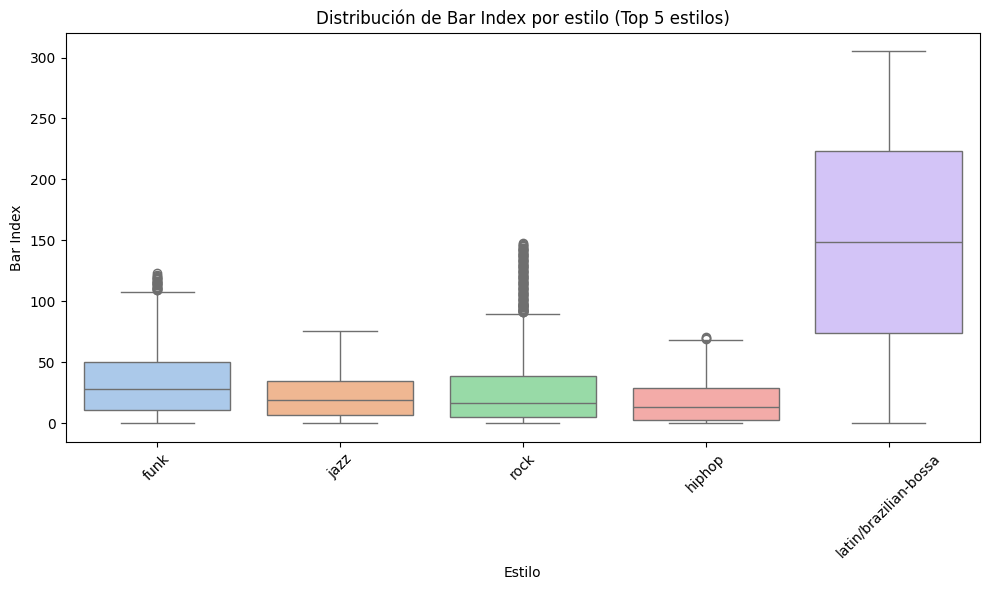

In [16]:
# ✅ Celda 13: Boxplot de bar_index por estilo

def crear_boxplot_barindex_por_style(meta_df, path_img='images/boxplot_barindex_por_style.png', top_n_styles=5):
    """
    Genera un boxplot de bar_index por estilo (top N estilos) y lo guarda.

    Parámetros:
    - meta_df (DataFrame): DataFrame con los metadatos
    - path_img (str): ruta para guardar la imagen
    - top_n_styles (int): número de estilos más frecuentes a considerar
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scripts.utils import guardar_y_mostrar_figura

    top_styles = meta_df['style'].value_counts().head(top_n_styles).index
    df_plot = meta_df[meta_df['style'].isin(top_styles)]

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(data=df_plot, x='style', y='bar_index', palette='pastel', ax=ax)
    ax.set_title("Distribución de Bar Index por estilo (Top 5 estilos)")
    ax.set_xlabel("Estilo")
    ax.set_ylabel("Bar Index")
    plt.xticks(rotation=45)
    plt.tight_layout()

    guardar_y_mostrar_figura(fig, path_img)

# Ejecutar
crear_boxplot_barindex_por_style(meta_df)


> ✅ **Resultado esperado**: 
> 
> Se generó un boxplot que muestra la distribución de `bar_index` por estilo (Top 5 estilos más frecuentes). 
> 
> 🧠 **Observaciones**:
> - El estilo `latin/brazilian-bossa` muestra un rango de `bar_index` mucho más amplio y con mayor dispersión que los demás estilos.
> - Los estilos `funk`, `jazz`, `rock` y `hiphop` tienen distribuciones de compases más concentradas en rangos bajos.
> - Esto podría indicar diferencias en la estructura de los patrones rítmicos entre estilos.


### 🔢 Celda 14 – Histogramas de Bar Index por estilo

Esta celda genera histogramas individuales de `bar_index` para los 5 estilos más frecuentes.
La imagen se guarda automáticamente en `images/hist_barindex_por_style.png` y se muestra en el notebook.


🖼️ Imagen guardada en: images/hist_barindex_por_style.png


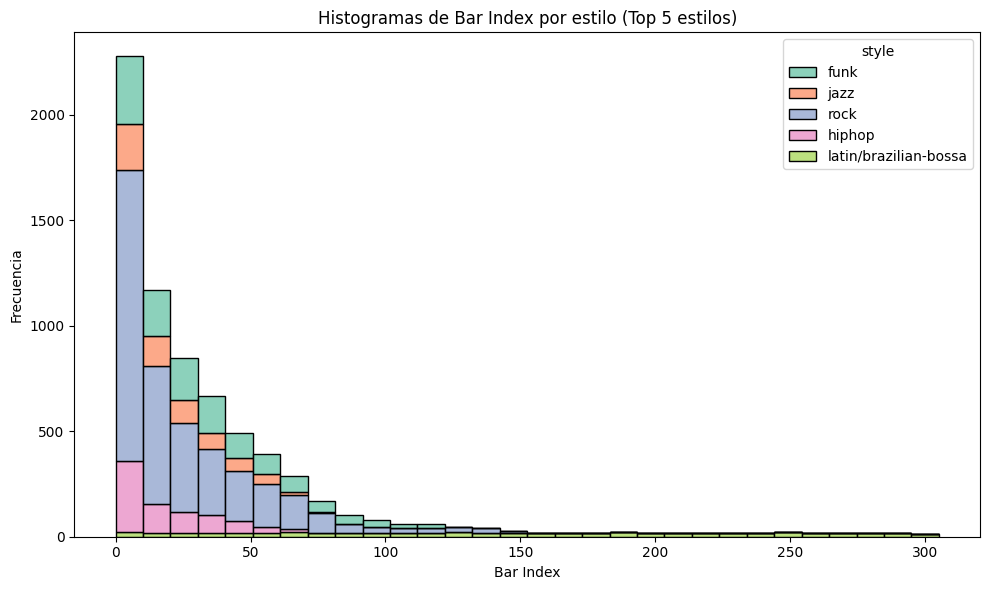

In [17]:
# ✅ Celda 14: Histogramas de bar_index por estilo

def crear_hist_barindex_por_style(meta_df, path_img='images/hist_barindex_por_style.png', top_n_styles=5):
    """
    Genera histogramas de bar_index por estilo (top N estilos) y los guarda.

    Parámetros:
    - meta_df (DataFrame): DataFrame con los metadatos
    - path_img (str): ruta para guardar la imagen
    - top_n_styles (int): número de estilos más frecuentes a considerar
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scripts.utils import guardar_y_mostrar_figura

    top_styles = meta_df['style'].value_counts().head(top_n_styles).index
    df_plot = meta_df[meta_df['style'].isin(top_styles)]

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(data=df_plot, x='bar_index', hue='style', multiple='stack', bins=30, palette='Set2', ax=ax)
    ax.set_title("Histogramas de Bar Index por estilo (Top 5 estilos)")
    ax.set_xlabel("Bar Index")
    ax.set_ylabel("Frecuencia")
    plt.tight_layout()

    guardar_y_mostrar_figura(fig, path_img)

# Ejecutar
crear_hist_barindex_por_style(meta_df)


> ✅ **Resultado esperado**: 
> 
> Se generó un histograma apilado que muestra la distribución de `bar_index` para los 5 estilos más frecuentes. 
> 
> 🧠 **Observaciones**:
> - La mayoría de los compases (`bar_index`) se concentran en valores bajos (0 a 50), lo que es consistente con la estructura de grooves típicos.
> - El estilo `rock` domina las frecuencias en los primeros compases.
> - El estilo `latin/brazilian-bossa` tiene una presencia más notable en compases altos, lo que refuerza la observación de estructuras más largas.


### 🔢 Celda 15 – Histogramas de BPM original por estilo

Esta celda genera histogramas de `bpm_orig` para los 5 estilos más frecuentes, apilados por estilo.
La imagen se guarda automáticamente en `images/hist_bpm_por_style.png` y se muestra en el notebook.


🖼️ Imagen guardada en: images/hist_bpm_por_style.png


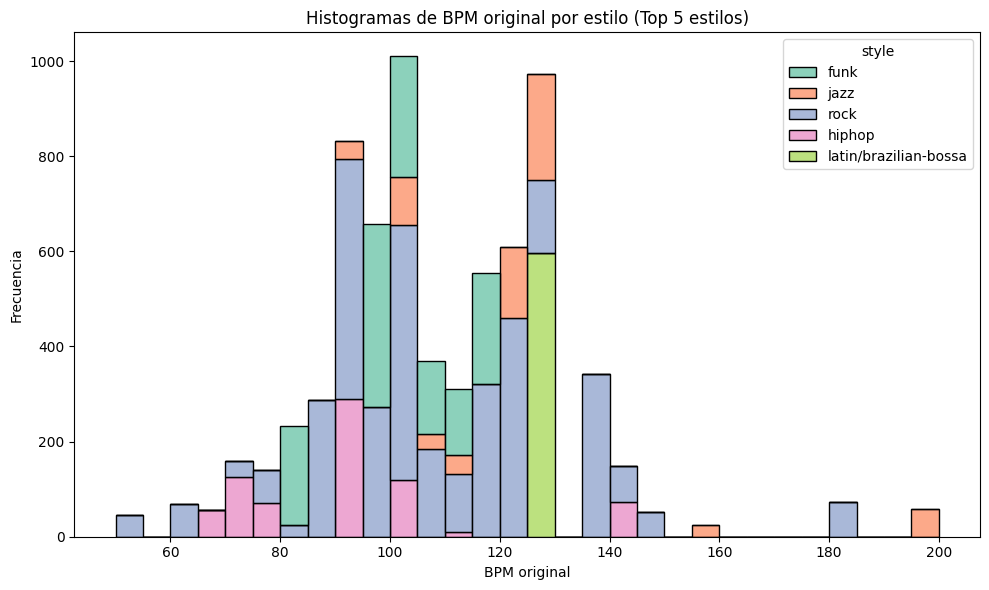

In [18]:
# ✅ Celda 15: Histograma de bpm_orig por estilo

def crear_hist_bpm_por_style(meta_df, path_img='images/hist_bpm_por_style.png', top_n_styles=5):
    """
    Genera histogramas de bpm_orig por estilo (top N estilos) y los guarda.

    Parámetros:
    - meta_df (DataFrame): DataFrame con los metadatos
    - path_img (str): ruta para guardar la imagen
    - top_n_styles (int): número de estilos más frecuentes a considerar
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scripts.utils import guardar_y_mostrar_figura

    top_styles = meta_df['style'].value_counts().head(top_n_styles).index
    df_plot = meta_df[meta_df['style'].isin(top_styles)]

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(data=df_plot, x='bpm_orig', hue='style', multiple='stack', bins=30, palette='Set2', ax=ax)
    ax.set_title("Histogramas de BPM original por estilo (Top 5 estilos)")
    ax.set_xlabel("BPM original")
    ax.set_ylabel("Frecuencia")
    plt.tight_layout()

    guardar_y_mostrar_figura(fig, path_img)

# Ejecutar
crear_hist_bpm_por_style(meta_df)


> ✅ **Resultado esperado**: 
> 
> Se generó un histograma apilado que muestra la distribución de `bpm_orig` para los 5 estilos más frecuentes. 
> 
> 🧠 **Observaciones**:
> - Los estilos principales tienden a concentrarse en los rangos de 90 a 130 BPM.
> - `latin/brazilian-bossa` tiene una concentración notable alrededor de 130 BPM.
> - `hiphop` se distribuye más en los rangos bajos (por debajo de 100 BPM).
> - `rock` está bien representado a lo largo del rango 90-140 BPM.
> 
> Esto sugiere que el `bpm_orig` podría ser un feature relevante para la clasificación de estilos.


### 🔢 Celda 15A – Histogramas de BPM original por estilo (facetas)

Esta celda genera histogramas separados (facetas) de `bpm_orig` para los 5 estilos más frecuentes.
La imagen se guarda automáticamente en `images/hist_bpm_facet_por_style.png` y se muestra en el notebook.


C:\Users\apont\AppData\Local\Temp\ipykernel_8004\1147236367.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.displot(


🖼️ Imagen guardada en: images/hist_bpm_facet_por_style.png


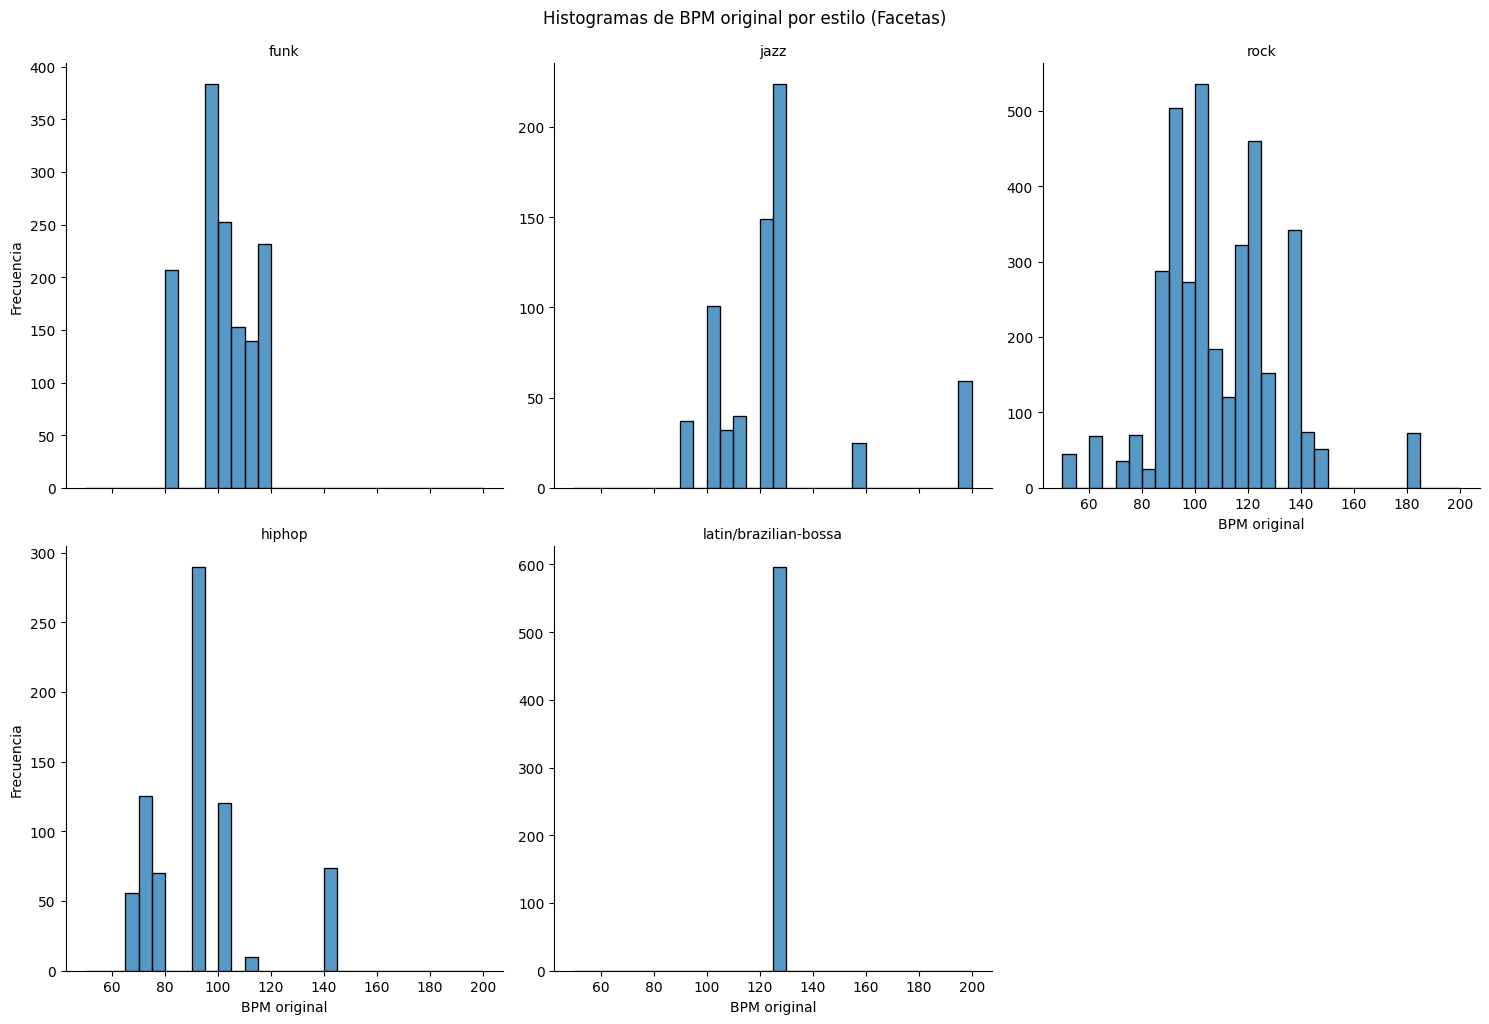

In [19]:
# ✅ Celda 15A: Histogramas de bpm_orig por estilo con facetas

def crear_hist_bpm_facet_por_style(meta_df, path_img='images/hist_bpm_facet_por_style.png', top_n_styles=5):
    """
    Genera histogramas de bpm_orig por estilo usando facetas y los guarda.

    Parámetros:
    - meta_df (DataFrame): DataFrame con los metadatos
    - path_img (str): ruta para guardar la imagen
    - top_n_styles (int): número de estilos más frecuentes a considerar
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scripts.utils import guardar_y_mostrar_figura

    top_styles = meta_df['style'].value_counts().head(top_n_styles).index
    df_plot = meta_df[meta_df['style'].isin(top_styles)]

    g = sns.displot(
        data=df_plot,
        x='bpm_orig',
        col='style',
        col_wrap=3,
        bins=30,
        facet_kws={'sharey': False, 'sharex': True},
        palette='Set2'
    )
    g.set_titles("{col_name}")
    g.set_axis_labels("BPM original", "Frecuencia")
    g.fig.suptitle("Histogramas de BPM original por estilo (Facetas)", y=1.02)

    # Guardar figura
    os.makedirs(os.path.dirname(path_img), exist_ok=True)
    g.savefig(path_img)
    print(f"🖼️ Imagen guardada en: {path_img}")
    plt.show()

# Ejecutar
crear_hist_bpm_facet_por_style(meta_df)


> ✅ **Resultado esperado**: 
> 
> Se generaron histogramas de `bpm_orig` separados por estilo para los 5 estilos más frecuentes. 
> 
> 🧠 **Observaciones**:
> - **Funk**: se concentra mayormente entre 95 y 110 BPM.
> - **Jazz**: tiene dos zonas de concentración principales: una cerca de 100-110 BPM y otra aislada más alta (alrededor de 190-200 BPM, posible outlier o estilo rápido).
> - **Rock**: distribuido de manera más uniforme, con presencia notable entre 90 y 130 BPM.
> - **HipHop**: claramente concentrado en rangos más bajos, entre 80 y 100 BPM.
> - **Latin/Brazilian-Bossa**: muy concentrado alrededor de 125-130 BPM, mostrando un tempo muy característico y consistente.


### 🔢 Celda 15B – Gráficos de línea de BPM original por estilo

Esta celda genera un gráfico de línea con la distribución de `bpm_orig` por estilo (Top 5 estilos).
La imagen se guarda automáticamente en `images/lineplot_bpm_por_style.png` y se muestra en el notebook.


🖼️ Imagen guardada en: images/lineplot_bpm_por_style.png


C:\Users\apont\AppData\Local\Temp\ipykernel_8004\3197328109.py:23: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset['bpm_orig'], label=style, ax=ax)


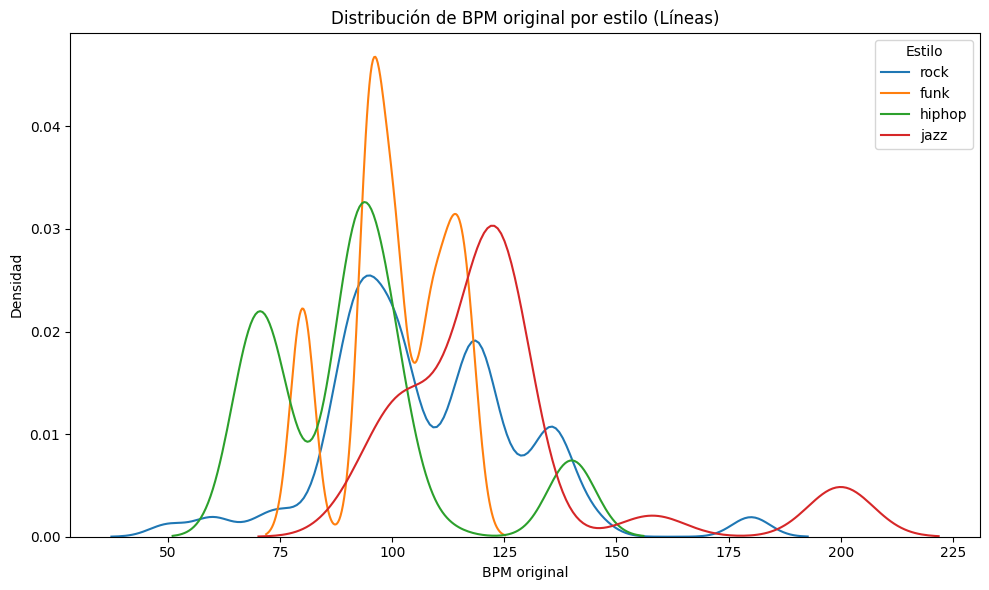

In [20]:
# ✅ Celda 15B: Gráficos de línea de bpm_orig por estilo

def crear_lineplot_bpm_por_style(meta_df, path_img='images/lineplot_bpm_por_style.png', top_n_styles=5):
    """
    Genera un gráfico de líneas de bpm_orig por estilo y lo guarda.

    Parámetros:
    - meta_df (DataFrame): DataFrame con los metadatos
    - path_img (str): ruta para guardar la imagen
    - top_n_styles (int): número de estilos más frecuentes a considerar
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scripts.utils import guardar_y_mostrar_figura

    top_styles = meta_df['style'].value_counts().head(top_n_styles).index
    df_plot = meta_df[meta_df['style'].isin(top_styles)]

    fig, ax = plt.subplots(figsize=(10, 6))

    for style in top_styles:
        subset = df_plot[df_plot['style'] == style]
        sns.kdeplot(subset['bpm_orig'], label=style, ax=ax)

    ax.set_title("Distribución de BPM original por estilo (Líneas)")
    ax.set_xlabel("BPM original")
    ax.set_ylabel("Densidad")
    ax.legend(title="Estilo")
    plt.tight_layout()

    guardar_y_mostrar_figura(fig, path_img)

# Ejecutar
crear_lineplot_bpm_por_style(meta_df)


> ✅ **Resultado esperado**: 
> 
> Se generó un gráfico de líneas que compara la distribución de `bpm_orig` entre los estilos principales.
> 
> 🧠 **Observaciones**:
> - `funk` tiene un tempo muy consistente cerca de 95-100 BPM.
> - `hiphop` muestra dos zonas claras: un rango lento y uno medio.
> - `rock` presenta una distribución más variada.
> - `jazz` incluye tempos medios y un grupo rápido cerca de 200 BPM.


### 🔢 Celda 16 – Pairplot de BPM original, Bar Index y baterista

Esta celda genera un pairplot para explorar la relación entre `bpm_orig`, `bar_index` y `drummer` (limitado a los 5 drummers más frecuentes).
La imagen se guarda automáticamente en `images/pairplot_bpm_barindex_drummer.png` y se muestra en el notebook.


🖼️ Imagen guardada en: images/pairplot_bpm_barindex_drummer.png


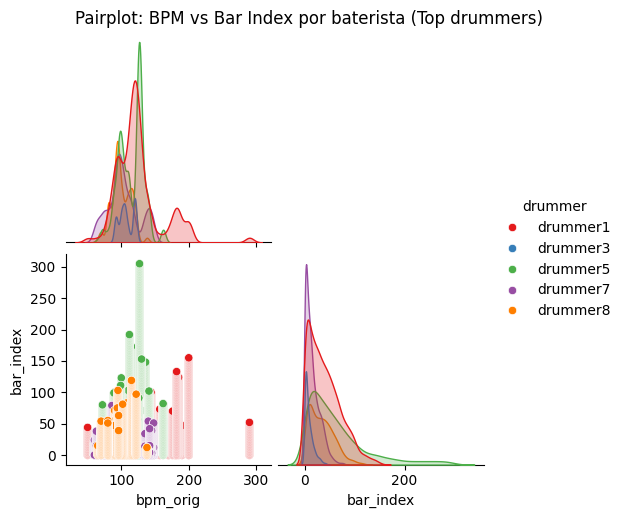

In [21]:
# ✅ Celda 16: Pairplot bpm_orig, bar_index y drummer

def crear_pairplot_bpm_barindex_drummer(meta_df, path_img='images/pairplot_bpm_barindex_drummer.png', top_n_drummers=5):
    """
    Genera un pairplot entre bpm_orig, bar_index y drummer (top N drummers) y lo guarda.

    Parámetros:
    - meta_df (DataFrame): DataFrame con los metadatos
    - path_img (str): ruta para guardar la imagen
    - top_n_drummers (int): número de drummers más frecuentes a considerar
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scripts.utils import guardar_y_mostrar_figura

    top_drummers = meta_df['drummer'].value_counts().head(top_n_drummers).index
    df_plot = meta_df[meta_df['drummer'].isin(top_drummers)]

    pairplot = sns.pairplot(
        df_plot,
        vars=['bpm_orig', 'bar_index'],
        hue='drummer',
        palette='Set1',
        corner=True,
        diag_kind='kde'
    )
    pairplot.fig.suptitle("Pairplot: BPM vs Bar Index por baterista (Top drummers)", y=1.02)

    # Guardar figura
    os.makedirs(os.path.dirname(path_img), exist_ok=True)
    pairplot.savefig(path_img)
    print(f"🖼️ Imagen guardada en: {path_img}")
    plt.show()

# Ejecutar
crear_pairplot_bpm_barindex_drummer(meta_df)


> ✅ **Resultado esperado**: 
> 
> Se generó un pairplot que muestra la relación entre `bpm_orig`, `bar_index` y los bateristas principales.
> 
> 🧠 **Observaciones**:
> - `drummer5` tiene los compases más largos (bar_index altos).
> - `drummer1` cubre un rango de BPM muy amplio, con algunos valores extremadamente altos.
> - `drummer8` está muy concentrado en tempos medios y compases cortos.
> - Hay superposición de BPM típicos (90-110) entre los principales bateristas.


### 🔢 Celda 17 – Scatterplot BPM vs Bar Index por estilo

Esta celda genera un scatterplot que muestra la relación entre `bpm_orig` y `bar_index`, coloreado por estilo (Top 5 estilos).
La imagen se guarda automáticamente en `images/scatter_bpm_barindex_style.png` y se muestra en el notebook.


🖼️ Imagen guardada en: images/scatter_bpm_barindex_style.png


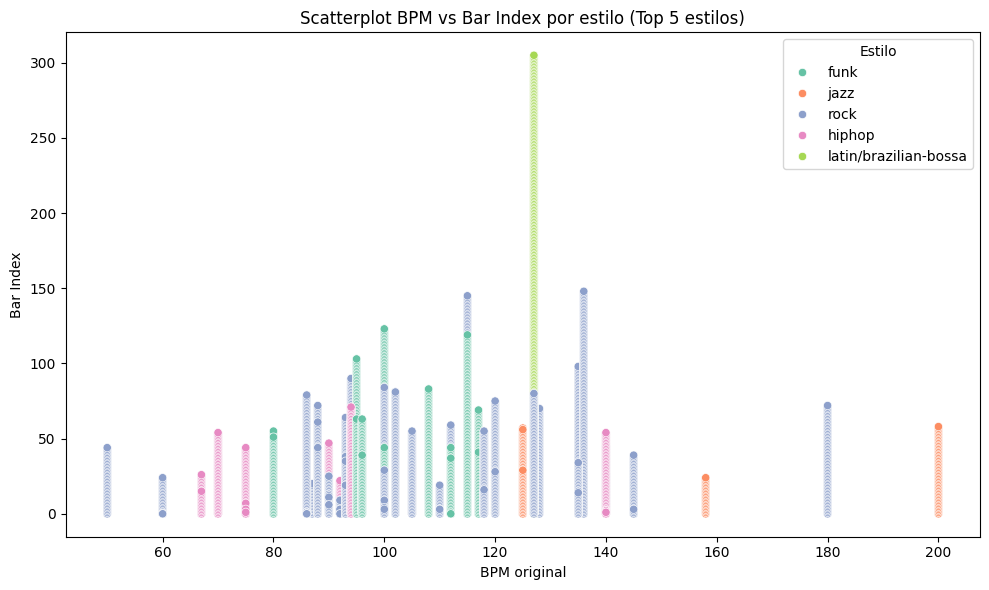

In [22]:
# ✅ Celda 17: Scatterplot bpm_orig vs bar_index por estilo

def crear_scatter_bpm_barindex_style(meta_df, path_img='images/scatter_bpm_barindex_style.png', top_n_styles=5):
    """
    Genera un scatterplot de bpm_orig vs bar_index coloreado por estilo (top N estilos) y lo guarda.

    Parámetros:
    - meta_df (DataFrame): DataFrame con los metadatos
    - path_img (str): ruta para guardar la imagen
    - top_n_styles (int): número de estilos más frecuentes a considerar
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scripts.utils import guardar_y_mostrar_figura

    top_styles = meta_df['style'].value_counts().head(top_n_styles).index
    df_plot = meta_df[meta_df['style'].isin(top_styles)]

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(data=df_plot, x='bpm_orig', y='bar_index', hue='style', palette='Set2', ax=ax)
    ax.set_title("Scatterplot BPM vs Bar Index por estilo (Top 5 estilos)")
    ax.set_xlabel("BPM original")
    ax.set_ylabel("Bar Index")
    ax.legend(title="Estilo")
    plt.tight_layout()

    guardar_y_mostrar_figura(fig, path_img)

# Ejecutar
crear_scatter_bpm_barindex_style(meta_df)


> ✅ **Resultado esperado**: 
> 
> Se generó un scatterplot que muestra la relación entre `bpm_orig` y `bar_index` coloreado por estilo.
> 
> 🧠 **Observaciones**:
> - `latin/brazilian-bossa` destaca por sus compases muy largos (bar_index altos).
> - `hiphop` se concentra en tempos bajos y compases cortos.
> - `rock` y `funk` se distribuyen en un rango más amplio de tempos, pero con compases generalmente más cortos.
> - Hay una fuerte superposición entre estilos en el rango 90-110 BPM y compases bajos.


### 🔢 Celda 18 – Heatmap de frecuencia: estilo vs baterista

Esta celda genera un heatmap que muestra la frecuencia de combinaciones entre `style` y `drummer` (Top 5 estilos y Top 5 drummers).
La imagen se guarda automáticamente en `images/heatmap_style_drummer.png` y se muestra en el notebook.


🖼️ Imagen guardada en: images/heatmap_style_drummer.png


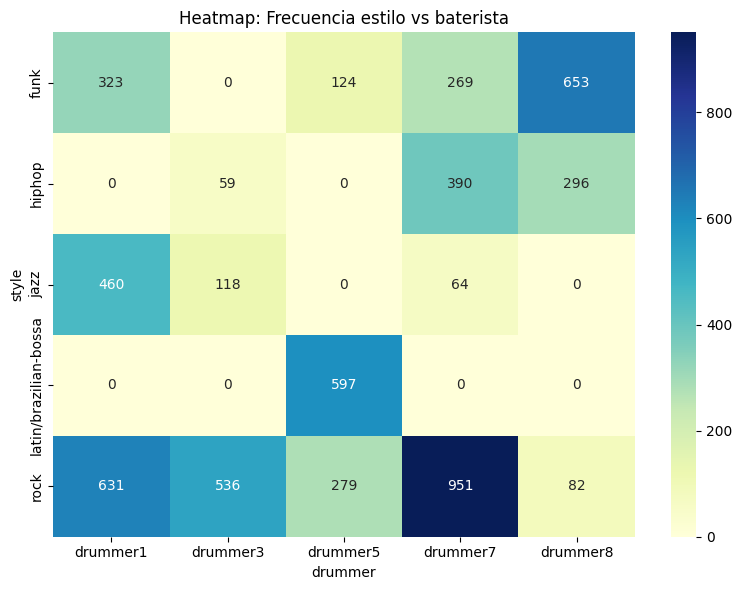

In [23]:
# ✅ Celda 18: Heatmap estilo vs drummer

def crear_heatmap_style_drummer(meta_df, path_img='images/heatmap_style_drummer.png', top_n_styles=5, top_n_drummers=5):
    """
    Genera un heatmap de frecuencia estilo vs baterista y lo guarda.

    Parámetros:
    - meta_df (DataFrame): DataFrame con los metadatos
    - path_img (str): ruta para guardar la imagen
    - top_n_styles (int): número de estilos más frecuentes
    - top_n_drummers (int): número de drummers más frecuentes
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scripts.utils import guardar_y_mostrar_figura

    top_styles = meta_df['style'].value_counts().head(top_n_styles).index
    top_drummers = meta_df['drummer'].value_counts().head(top_n_drummers).index

    df_plot = meta_df[
        meta_df['style'].isin(top_styles) & meta_df['drummer'].isin(top_drummers)
    ]

    tabla = pd.crosstab(df_plot['style'], df_plot['drummer'])

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(tabla, annot=True, fmt='d', cmap='YlGnBu', ax=ax)
    ax.set_title("Heatmap: Frecuencia estilo vs baterista")
    plt.tight_layout()

    guardar_y_mostrar_figura(fig, path_img)

# Ejecutar
crear_heatmap_style_drummer(meta_df)


> ✅ **Resultado esperado**: 
> 
> Se generó un heatmap que muestra la frecuencia de combinaciones estilo-baterista (Top 5 estilos y Top 5 drummers).
> 
> 🧠 **Observaciones**:
> - `drummer7` domina en `rock` y tiene un rol destacado en `hiphop`.
> - `drummer5` parece especializado en `latin/brazilian-bossa`.
> - `drummer8` tiene un peso alto en `funk`.
> - Las combinaciones no existentes refuerzan que algunos drummers están asociados a estilos específicos.


### 🔢 Celda 19 – Boxplot de BPM original por estilo

Esta celda genera un boxplot que muestra la distribución de `bpm_orig` para los 5 estilos más frecuentes.
La imagen se guarda automáticamente en `images/boxplot_bpm_por_style.png` y se muestra en el notebook.


🖼️ Imagen guardada en: images/boxplot_bpm_por_style.png


C:\Users\apont\AppData\Local\Temp\ipykernel_8004\1764812424.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='style', y='bpm_orig', palette='Set2', ax=ax)
C:\Users\apont\AppData\Local\Temp\ipykernel_8004\1764812424.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


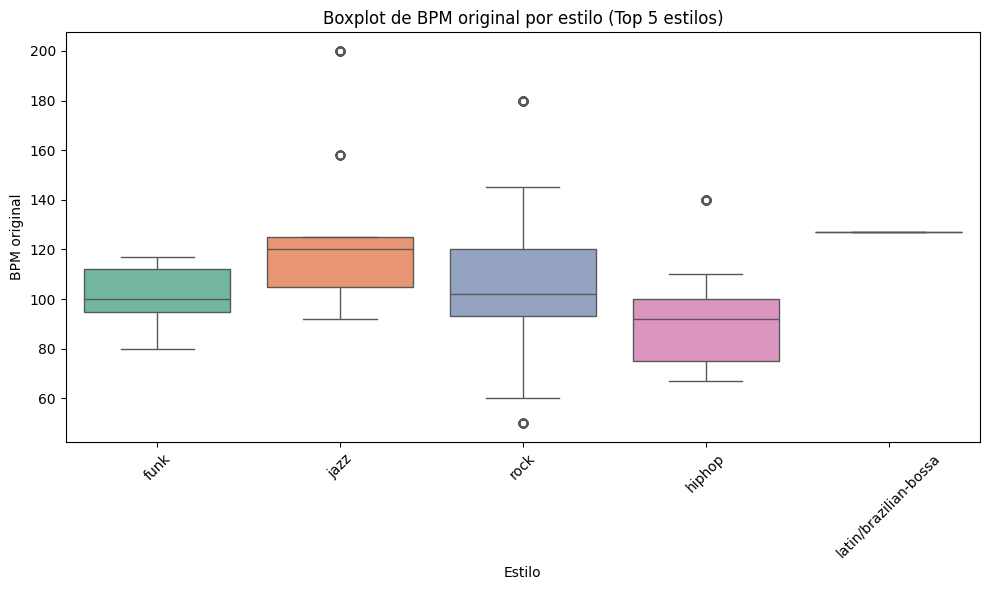

In [24]:
# ✅ Celda 19: Boxplot de bpm_orig por estilo

def crear_boxplot_bpm_por_style(meta_df, path_img='images/boxplot_bpm_por_style.png', top_n_styles=5):
    """
    Genera un boxplot de bpm_orig por estilo (top N estilos) y lo guarda.

    Parámetros:
    - meta_df (DataFrame): DataFrame con los metadatos
    - path_img (str): ruta para guardar la imagen
    - top_n_styles (int): número de estilos más frecuentes
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scripts.utils import guardar_y_mostrar_figura

    top_styles = meta_df['style'].value_counts().head(top_n_styles).index
    df_plot = meta_df[meta_df['style'].isin(top_styles)]

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(data=df_plot, x='style', y='bpm_orig', palette='Set2', ax=ax)
    ax.set_title("Boxplot de BPM original por estilo (Top 5 estilos)")
    ax.set_xlabel("Estilo")
    ax.set_ylabel("BPM original")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.tight_layout()

    guardar_y_mostrar_figura(fig, path_img)

# Ejecutar
crear_boxplot_bpm_por_style(meta_df)


> ✅ **Resultado esperado**: 
> 
> Se generó un boxplot de `bpm_orig` por estilo (Top 5 estilos).
> 
> 🧠 **Observaciones**:
> - `hiphop` es el estilo con los tempos más bajos y consistentes.
> - `latin/brazilian-bossa` muestra un tempo extremadamente uniforme (128 BPM).
> - `rock` y `jazz` presentan mayor dispersión de tempos.
> - Los outliers en `jazz` y `rock` podrían indicar grooves rápidos o variaciones estilísticas.


### 🔢 Celda 20 – Heatmap de correlación avanzada

Esta celda genera un heatmap de correlación que incluye `bpm_orig`, `bar_index`, y codificaciones numéricas de `style` y `drummer` (Top 5 de cada uno).
La imagen se guarda automáticamente en `images/heatmap_correlacion_avanzada.png` y se muestra en el notebook.


🖼️ Imagen guardada en: images/heatmap_correlacion_avanzada.png


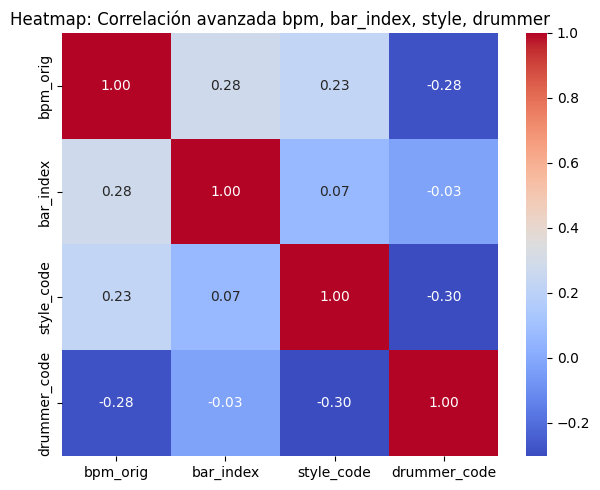

In [25]:
# ✅ Celda 20: Heatmap de correlación avanzada

def crear_heatmap_correlacion_avanzada(meta_df, path_img='images/heatmap_correlacion_avanzada.png', top_n_styles=5, top_n_drummers=5):
    """
    Genera un heatmap de correlación incluyendo codificación numérica de style y drummer.

    Parámetros:
    - meta_df (DataFrame): DataFrame con los metadatos
    - path_img (str): ruta para guardar la imagen
    - top_n_styles (int): número de estilos más frecuentes
    - top_n_drummers (int): número de drummers más frecuentes
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scripts.utils import guardar_y_mostrar_figura

    # Filtrar top estilos y drummers
    top_styles = meta_df['style'].value_counts().head(top_n_styles).index
    top_drummers = meta_df['drummer'].value_counts().head(top_n_drummers).index

    df_plot = meta_df[
        meta_df['style'].isin(top_styles) & meta_df['drummer'].isin(top_drummers)
    ].copy()

    # Codificar
    df_plot['style_code'] = df_plot['style'].astype('category').cat.codes
    df_plot['drummer_code'] = df_plot['drummer'].astype('category').cat.codes

    # Correlación
    corr = df_plot[['bpm_orig', 'bar_index', 'style_code', 'drummer_code']].corr()

    # Heatmap
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', ax=ax)
    ax.set_title("Heatmap: Correlación avanzada bpm, bar_index, style, drummer")
    plt.tight_layout()

    guardar_y_mostrar_figura(fig, path_img)

# Ejecutar
crear_heatmap_correlacion_avanzada(meta_df)


> ✅ **Resultado esperado**: 
> 
> Se generó un heatmap de correlación avanzada incluyendo `bpm_orig`, `bar_index`, `style_code` y `drummer_code`.
> 
> 🧠 **Observaciones**:
> - Existe una correlación moderada entre `bpm_orig` y `bar_index` (+0.28).
> - El tempo también tiene relación moderada con `style_code` (+0.23) y negativa con `drummer_code` (-0.28).
> - La relación entre `style_code` y `drummer_code` (-0.30) refuerza que ciertos drummers se asocian a estilos específicos.
> - Las demás combinaciones muestran correlaciones débiles.


### 🔢 Celda 21 – Barplot stacked: cantidad de grooves por estilo y baterista

Esta celda genera un barplot apilado que muestra cuántas muestras (grooves) tiene cada estilo, desglosado por baterista.
La imagen se guarda automáticamente en `images/barplot_grooves_style_drummer.png` y se muestra en el notebook.


🖼️ Imagen guardada en: images/barplot_grooves_style_drummer.png


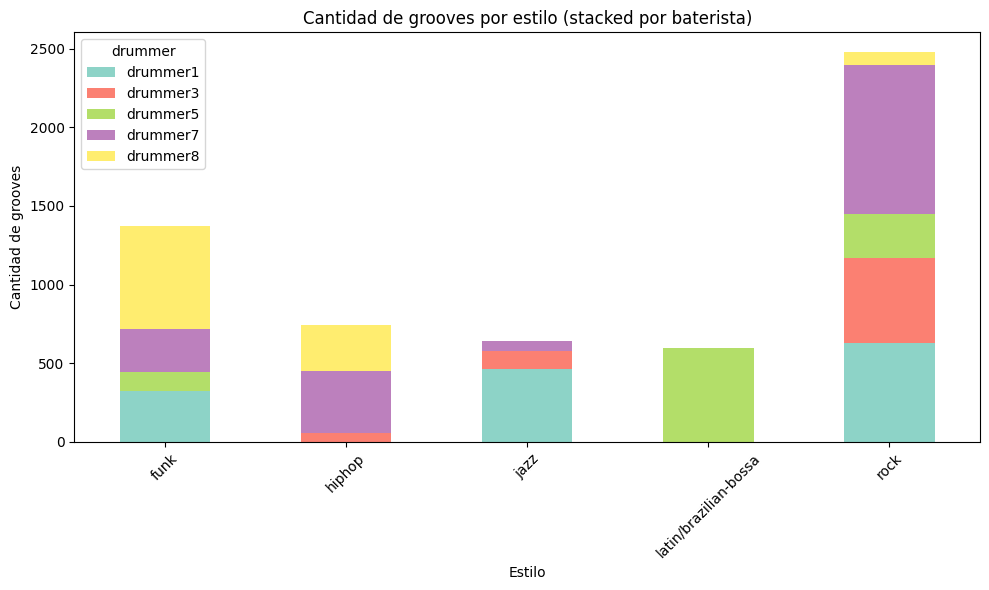

In [26]:
# ✅ Celda 21: Barplot stacked style + drummer

def crear_barplot_grooves_style_drummer(meta_df, path_img='images/barplot_grooves_style_drummer.png', top_n_styles=5, top_n_drummers=5):
    """
    Genera un barplot stacked de cantidad de grooves por estilo y baterista.

    Parámetros:
    - meta_df (DataFrame): DataFrame con los metadatos
    - path_img (str): ruta para guardar la imagen
    - top_n_styles (int): número de estilos más frecuentes
    - top_n_drummers (int): número de drummers más frecuentes
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scripts.utils import guardar_y_mostrar_figura

    # Filtrar
    top_styles = meta_df['style'].value_counts().head(top_n_styles).index
    top_drummers = meta_df['drummer'].value_counts().head(top_n_drummers).index

    df_plot = meta_df[
        meta_df['style'].isin(top_styles) & meta_df['drummer'].isin(top_drummers)
    ]

    # Agrupar
    tabla = pd.crosstab(df_plot['style'], df_plot['drummer'])

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    tabla.plot(kind='bar', stacked=True, ax=ax, colormap='Set3')
    ax.set_title("Cantidad de grooves por estilo (stacked por baterista)")
    ax.set_xlabel("Estilo")
    ax.set_ylabel("Cantidad de grooves")
    plt.xticks(rotation=45)
    plt.tight_layout()

    guardar_y_mostrar_figura(fig, path_img)

# Ejecutar
crear_barplot_grooves_style_drummer(meta_df)


> ✅ **Resultado esperado**: 
> 
> Se generó un barplot stacked que muestra la cantidad de grooves por estilo, desglosado por baterista.
> 
> 🧠 **Observaciones**:
> - `drummer8` domina en funk.
> - `drummer5` está casi exclusivamente en `latin/brazilian-bossa`.
> - `drummer7` tiene un peso muy alto en rock e hiphop.
> - `rock` es el estilo con mayor diversidad de drummers en este análisis.


### 🔢 Celda 22 – Violinplot de BPM original por baterista

Esta celda genera un violinplot que muestra la distribución completa de `bpm_orig` para los 5 drummers más frecuentes.
La imagen se guarda automáticamente en `images/violinplot_bpm_por_drummer.png` y se muestra en el notebook.


C:\Users\apont\AppData\Local\Temp\ipykernel_8004\2312982784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot, x='drummer', y='bpm_orig', palette='Set3', ax=ax, inner='box')


🖼️ Imagen guardada en: images/violinplot_bpm_por_drummer.png


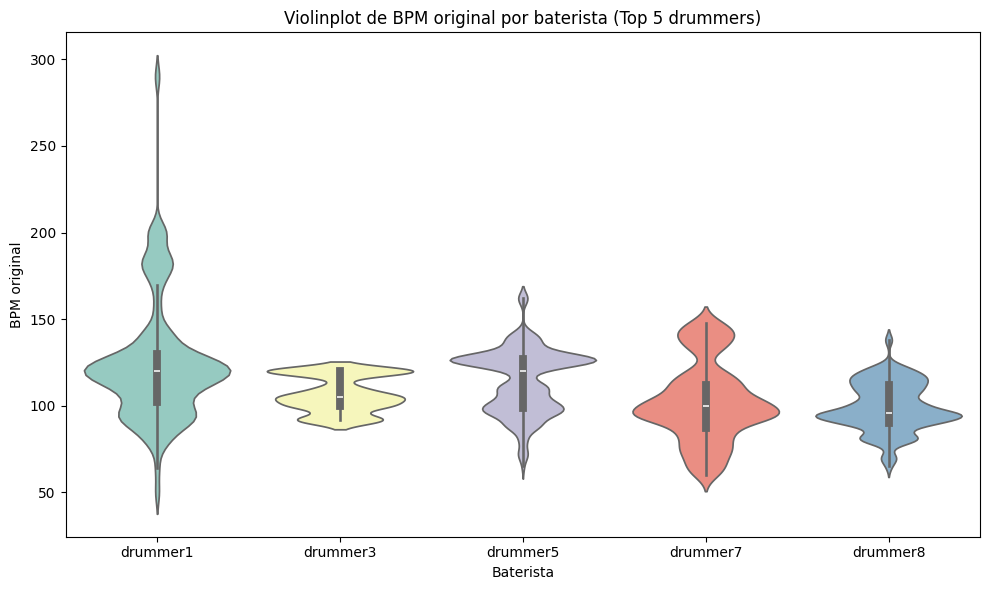

In [27]:
# ✅ Celda 22: Violinplot bpm_orig por drummer

def crear_violinplot_bpm_por_drummer(meta_df, path_img='images/violinplot_bpm_por_drummer.png', top_n_drummers=5):
    """
    Genera un violinplot de bpm_orig por baterista (top N drummers) y lo guarda.

    Parámetros:
    - meta_df (DataFrame): DataFrame con los metadatos
    - path_img (str): ruta para guardar la imagen
    - top_n_drummers (int): número de drummers más frecuentes
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scripts.utils import guardar_y_mostrar_figura

    top_drummers = meta_df['drummer'].value_counts().head(top_n_drummers).index
    df_plot = meta_df[meta_df['drummer'].isin(top_drummers)]

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.violinplot(data=df_plot, x='drummer', y='bpm_orig', palette='Set3', ax=ax, inner='box')
    ax.set_title("Violinplot de BPM original por baterista (Top 5 drummers)")
    ax.set_xlabel("Baterista")
    ax.set_ylabel("BPM original")
    plt.tight_layout()

    guardar_y_mostrar_figura(fig, path_img)

# Ejecutar
crear_violinplot_bpm_por_drummer(meta_df)


> ✅ **Resultado esperado**: 
> 
> Se generó un violinplot de `bpm_orig` por baterista (Top 5 drummers).
> 
> 🧠 **Observaciones**:
> - `drummer1` presenta la mayor diversidad de tempos, incluyendo outliers a tempos muy altos.
> - `drummer3` es consistente en un rango estrecho de tempos.
> - `drummer5` muestra una distribución bimodal, reflejando participación en grooves de diferentes tempos.
> - `drummer7` y `drummer8` tienen rangos intermedios con algunos picos en tempos específicos.


### 🔢 Celda 23 – Scatterplot combinado: BPM vs Bar Index por estilo y baterista

Esta celda genera un scatterplot con:
- Colores que indican el estilo
- Formas o marcas que representan el baterista
La imagen se guarda automáticamente en `images/scatter_bpm_barindex_style_drummer.png` y se muestra en el notebook.


In [ ]:
# ✅ Celda 23: KDE 2D de bpm vs bar_index por estilo con leyenda vinculada a colores

def crear_kde2d_bpm_barindex_con_leyenda(meta_df, path_img='images/kde2d_bpm_barindex_por_style_legend.png', top_n_styles=3):
    """
    Genera un KDE 2D con leyenda correcta para bpm_orig vs bar_index por estilo.

    Parámetros:
    - meta_df (DataFrame): DataFrame con los metadatos
    - path_img (str): ruta para guardar la imagen
    - top_n_styles (int): número de estilos más frecuentes
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scripts.utils import guardar_y_mostrar_figura
    import matplotlib.patches as mpatches

    # Filtrar top estilos
    top_styles = meta_df['style'].value_counts().head(top_n_styles).index
    df_plot = meta_df[meta_df['style'].isin(top_styles)]

    # Asignar colores únicos a cada estilo
    palette = sns.color_palette('Set1', n_colors=top_n_styles)

    fig, ax = plt.subplots(figsize=(10, 6))
    handles = []

    # Dibujar cada estilo
    for style, color in zip(top_styles, palette):
        subset = df_plot[df_plot['style'] == style]
        sns.kdeplot(
            data=subset,
            x='bpm_orig',
            y='bar_index',
            fill=True,
            alpha=0.4,
            color=color,
            linewidth=1,
            ax=ax
        )
        handles.append(mpatches.Patch(color=color, label=style))

    ax.set_title("KDE 2D: BPM vs Bar Index por estilo (Top 3 estilos) [Leyenda clara]")
    ax.set_xlabel("BPM original")
    ax.set_ylabel("Bar Index")
    ax.legend(handles=handles, title="Estilo")
    plt.tight_layout()

    guardar_y_mostrar_figura(fig, path_img)

# Ejecutar
crear_kde2d_bpm_barindex_con_leyenda(meta_df)


c:\Proyectos\Tesis\Ver 4\.venv\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


> ✅ **Resultado esperado**
> 
> Se generó un gráfico KDE 2D con leyenda clara que muestra la distribución conjunta de `bpm_orig` (tempo) y `bar_index` (longitud de groove) para los 3 estilos más frecuentes:
> 
> - 🔴 **Rock**
> - 🔵 **Funk**
> - 🟢 **Hiphop**
> 
> ---
> 
> ### 🧠 **Observaciones clave**
> 
> - **Rock (🔴)**: 
>   - Presenta la mayor dispersión en el espacio `bpm_orig` / `bar_index`. 
>   - Se observan grooves con longitudes superiores a 100 barras y una gama de tempos que abarca desde ~70 BPM hasta más de 140 BPM.  
>   - Esto sugiere gran diversidad en los patrones rítmicos de rock en el dataset.
> 
> - **Funk (🔵)**: 
>   - Concentrado principalmente en la región de **90-120 BPM** y con grooves de longitud moderada (0-50 bar index). 
>   - Muestra una distribución más compacta y coherente, lo que podría reflejar la naturaleza repetitiva y groove-based típica del funk.
> 
> - **Hiphop (🟢)**: 
>   - Se concentra en la zona de **70-110 BPM**, consistente con los tempos medios y lentos característicos del género.
>   - La longitud de los grooves en hiphop es predominantemente corta (0-50 bar index), lo que sugiere patrones rítmicos más sencillos o más fragmentados en el dataset.
> 
> ---
> 
> ### 📌 **Conclusiones preliminares**
> 
> - Los estilos comparten un área común de alta densidad en la región **80-120 BPM / 0-50 bar index**, reflejando un espacio rítmico central en el dataset.
> - El rock aporta mayor variedad tanto en tempo como en longitud de los grooves.
> - Este tipo de visualización nos permite anticipar qué combinaciones de tempo-longitud podrían ser más relevantes como features en un modelo de clasificación.
> 


### 🔢 Celda 24 – KDE 2D individual por estilo

Se genera un conjunto de subplots que representan el KDE 2D de `bpm_orig` vs `bar_index` por cada uno de los 3 estilos más frecuentes. 
Esto permite observar claramente la distribución de cada estilo sin superposición.
La imagen se guarda como `images/kde2d_subplots_por_style.png`.


c:\Proyectos\Tesis\Ver 4\.venv\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Proyectos\Tesis\Ver 4\.venv\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Proyectos\Tesis\Ver 4\.venv\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


🖼️ Imagen guardada en: images/kde2d_subplots_por_style.png


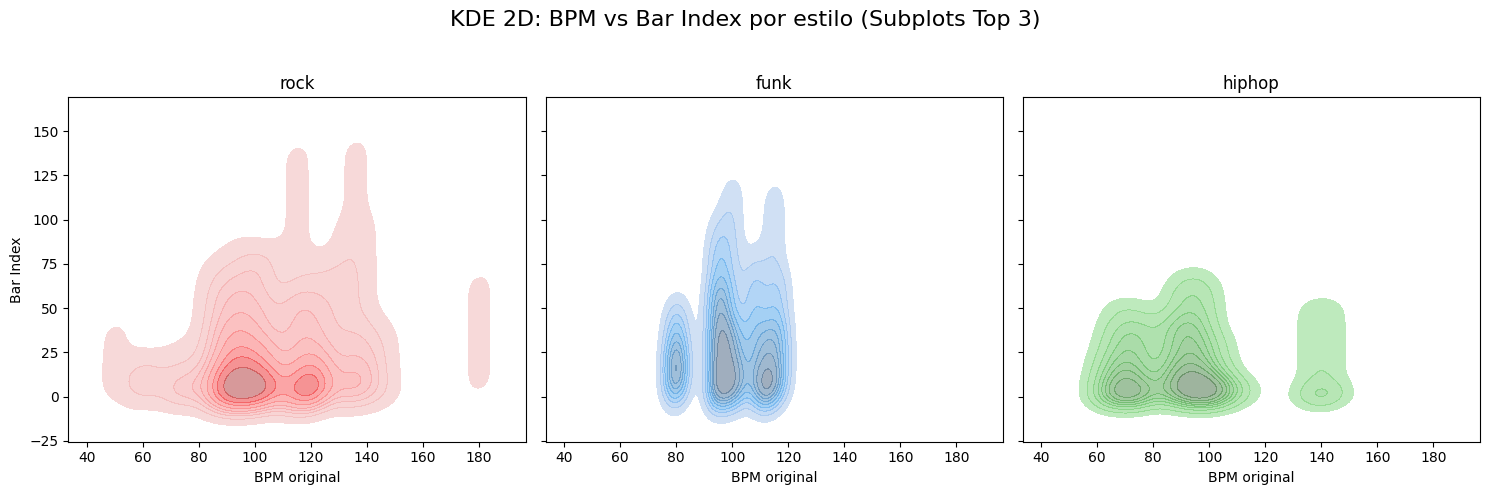

In [ ]:
# ✅ Subplots KDE 2D individuales por estilo

def crear_kde2d_subplots_por_style(meta_df, path_img='images/kde2d_subplots_por_style.png', top_n_styles=3):
    """
    Genera subplots con KDE 2D individuales de bpm_orig vs bar_index por estilo.

    Parámetros:
    - meta_df (DataFrame): DataFrame con los metadatos
    - path_img (str): ruta para guardar la imagen
    - top_n_styles (int): número de estilos más frecuentes
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scripts.utils import guardar_y_mostrar_figura

    top_styles = meta_df['style'].value_counts().head(top_n_styles).index
    palette = sns.color_palette('Set1', n_colors=top_n_styles)

    fig, axes = plt.subplots(1, top_n_styles, figsize=(5 * top_n_styles, 5), sharex=True, sharey=True)

    for ax, style, color in zip(axes, top_styles, palette):
        subset = meta_df[meta_df['style'] == style]
        sns.kdeplot(
            data=subset,
            x='bpm_orig',
            y='bar_index',
            fill=True,
            color=color,
            alpha=0.5,
            ax=ax,
            linewidth=1
        )
        ax.set_title(style)
        ax.set_xlabel("BPM original")
        ax.set_ylabel("Bar Index")

    fig.suptitle("KDE 2D: BPM vs Bar Index por estilo (Subplots Top 3)", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    guardar_y_mostrar_figura(fig, path_img)

# Ejecutar
crear_kde2d_subplots_por_style(meta_df)


> ✅ **Resultado esperado**
> 
> Se generaron subplots KDE 2D de `bpm_orig` vs `bar_index` por cada uno de los 3 estilos más frecuentes (Rock, Funk, Hiphop). 
> 
> ---
> 
> ### 🧠 **Observaciones clave**
> 
> - **Rock (🔴)**:
>   - Gran dispersión en el espacio `bpm_orig` / `bar_index`.
>   - Amplio rango de BPM: desde ~70 hasta más de 140 BPM.
>   - Longitudes de groove que llegan a superar 100 barras en algunos casos.
>   - Esto refleja la gran diversidad de estructuras rítmicas en el rock de nuestro dataset.
> 
> - **Funk (🔵)**:
>   - Distribución concentrada entre 90-120 BPM, consistente con el groove típico del género.
>   - Longitudes de groove mayormente menores a 50 barras.
>   - Patrón denso, reflejo de grooves repetitivos y bien definidos.
> 
> - **Hiphop (🟢)**:
>   - Predominio de grooves en el rango de 70-110 BPM.
>   - Longitud corta de grooves, concentrada bajo 50 barras.
>   - Refleja la naturaleza de loops cortos y patrones típicos del género.
> 
> ---
> 
> ### 🔍 **Conclusiones preliminares**
> 
> - Los subplots permiten observar sin interferencia las características propias de cada estilo.
> - Existe un área común (80-120 BPM / 0-50 bar index), pero cada estilo tiene una firma rítmica diferenciada.
> - Este tipo de visualización es útil para futuros modelos, especialmente para tareas de clasificación o segmentación por estilo.
> 

### 📊 Celda 25 – Resumen estadístico de BPM y Bar Index por estilo

Se genera un resumen estadístico con media, desviación estándar, mínimo, máximo y mediana de `bpm_orig` y `bar_index` para los 3 estilos más frecuentes. 
El resumen se guarda como `results/resumen_estadistico_por_style.csv` y se muestra a continuación.


In [ ]:
# ✅ Análisis estadístico por estilo: bpm_orig y bar_index

def resumen_estadistico_por_style(meta_df, path_csv='results/resumen_estadistico_por_style.csv', top_n_styles=3):
    """
    Genera un resumen estadístico (mean, std, min, max, median) de bpm_orig y bar_index por estilo.

    Parámetros:
    - meta_df (DataFrame): DataFrame con los metadatos
    - path_csv (str): ruta para guardar el CSV del resumen
    - top_n_styles (int): número de estilos más frecuentes a analizar
    """
    import pandas as pd
    from scripts.utils import guardar_y_mostrar_figura
    import os

    top_styles = meta_df['style'].value_counts().head(top_n_styles).index
    df_filtered = meta_df[meta_df['style'].isin(top_styles)]

    resumen = (
        df_filtered.groupby('style')
        .agg(
            bpm_mean=('bpm_orig', 'mean'),
            bpm_std=('bpm_orig', 'std'),
            bpm_min=('bpm_orig', 'min'),
            bpm_max=('bpm_orig', 'max'),
            bpm_median=('bpm_orig', 'median'),
            bar_mean=('bar_index', 'mean'),
            bar_std=('bar_index', 'std'),
            bar_min=('bar_index', 'min'),
            bar_max=('bar_index', 'max'),
            bar_median=('bar_index', 'median')
        )
        .reset_index()
    )

    # Guardar CSV
    os.makedirs(os.path.dirname(path_csv), exist_ok=True)
    resumen.to_csv(path_csv, index=False)

    # Mostrar resumen en notebook
    from IPython.display import display
    display(resumen)

# Ejecutar
resumen_estadistico_por_style(meta_df)


,style,bpm_mean,bpm_std,bpm_min,bpm_max,bpm_median,bar_mean,bar_std,bar_min,bar_max,bar_median
0,funk,100.568298,11.489694,80.0,117.0,100.0,33.954711,28.235735,0,123,28.0
1,hiphop,91.208054,20.001436,67.0,140.0,92.0,17.943624,16.954701,0,71,13.0
2,rock,107.504552,21.713264,50.0,180.0,102.0,25.992276,27.482564,0,148,17.0


> ✅ **Resultado esperado**
> 
> Se generó el resumen estadístico de `bpm_orig` y `bar_index` para los 3 estilos más frecuentes: 
> El archivo se guardó como `results/resumen_estadistico_por_style.csv`.
> 
> | style  | bpm_mean | bpm_std | bpm_min | bpm_max | bpm_median | bar_mean | bar_std | bar_min | bar_max | bar_median |
> |---------|----------|---------|---------|---------|------------|----------|---------|---------|---------|------------|
> | **funk** | 100.57   | 11.49   | 80.0    | 117.0   | 100.0      | 33.95    | 28.24   | 0       | 123     | 28.0       |
> | **hiphop** | 91.21    | 20.00   | 67.0    | 140.0   | 92.0       | 17.94    | 16.95   | 0       | 71      | 13.0       |
> | **rock** | 107.50   | 21.71   | 50.0    | 180.0   | 102.0      | 25.99    | 27.48   | 0       | 148     | 17.0       |
> 
> ---
> 
> ### 🧠 **Observaciones clave**
> 
> - **Funk**
>   - BPM promedio de ~100, con baja dispersión (std ~11.5), consistente con un tempo regular y centrado.
>   - Grooves de longitud media (mediana 28 barras), con algunos casos más largos (máx 123).
> 
> - **Hiphop**
>   - Tempo más lento (promedio ~91 BPM), pero con mayor variabilidad (std ~20), reflejando diversidad de beats.
>   - Grooves más cortos (mediana 13 barras), consistentes con loops y patrones breves típicos del género.
> 
> - **Rock**
>   - Tempo más rápido (promedio ~107 BPM), con la mayor dispersión (std ~21.7).
>   - Longitudes de groove más variables (mediana 17, pero máximos que alcanzan 148 barras).
> 
> ---
> 
> ### 📌 **Conclusiones preliminares**
> 
> - Cada estilo tiene una firma cuantitativa distintiva que complementa los análisis visuales.
> - Rock muestra la mayor diversidad tanto en tempo como en longitud de groove.
> - Este resumen puede ser usado para construir descriptores estadísticos como features en modelos predictivos.
> 


### 📦 Celda 26 – Boxplot de BPM y Bar Index con media y mediana

Se generan boxplots de `bpm_orig` y `bar_index` para los 3 estilos más frecuentes, 
con líneas de media (rojo, discontinua) y mediana (azul, punteada) para referencia. 
La imagen se guarda como `images/boxplot_bpm_barindex_stats.png`.


🖼️ Imagen guardada en: images/boxplot_bpm_barindex_stats.png


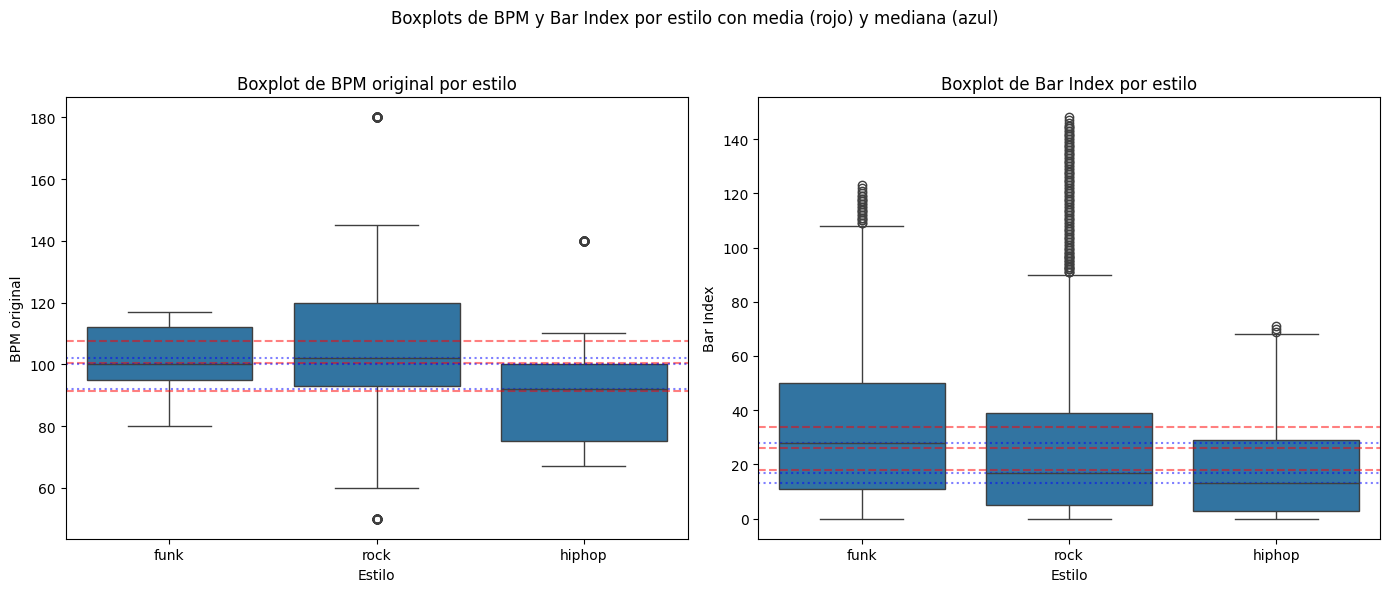

In [ ]:
def boxplot_bpm_barindex_con_estadisticas(meta_df, path_img='images/boxplot_bpm_barindex_stats.png', top_n_styles=3):
    """
    Genera boxplots combinados de bpm_orig y bar_index por estilo con líneas de media y mediana.
    
    Parámetros:
    - meta_df (DataFrame): DataFrame con metadatos
    - path_img (str): ruta para guardar la imagen
    - top_n_styles (int): número de estilos más frecuentes
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    from scripts.utils import guardar_y_mostrar_figura

    top_styles = meta_df['style'].value_counts().head(top_n_styles).index
    df_filtered = meta_df[meta_df['style'].isin(top_styles)]

    resumen = (
        df_filtered.groupby('style')
        .agg(
            bpm_mean=('bpm_orig', 'mean'),
            bpm_median=('bpm_orig', 'median'),
            bar_mean=('bar_index', 'mean'),
            bar_median=('bar_index', 'median')
        )
        .reset_index()
    )

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.boxplot(data=df_filtered, x='style', y='bpm_orig', ax=axes[0])
    axes[0].set_title("Boxplot de BPM original por estilo")
    axes[0].set_ylabel("BPM original")
    axes[0].set_xlabel("Estilo")

    for _, row in resumen.iterrows():
        axes[0].axhline(row['bpm_mean'], color='red', linestyle='--', alpha=0.5)
        axes[0].axhline(row['bpm_median'], color='blue', linestyle=':', alpha=0.5)

    sns.boxplot(data=df_filtered, x='style', y='bar_index', ax=axes[1])
    axes[1].set_title("Boxplot de Bar Index por estilo")
    axes[1].set_ylabel("Bar Index")
    axes[1].set_xlabel("Estilo")

    for _, row in resumen.iterrows():
        axes[1].axhline(row['bar_mean'], color='red', linestyle='--', alpha=0.5)
        axes[1].axhline(row['bar_median'], color='blue', linestyle=':', alpha=0.5)

    fig.suptitle("Boxplots de BPM y Bar Index por estilo con media (rojo) y mediana (azul)")
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    guardar_y_mostrar_figura(fig, path_img)

# Ejecutar
boxplot_bpm_barindex_con_estadisticas(meta_df)


> ✅ **Resultado esperado**
> 
> Se generaron boxplots de `bpm_orig` y `bar_index` para los 3 estilos más frecuentes: funk, rock y hiphop.  
> Las líneas discontínuas en rojo representan la **media**, mientras que las punteadas en azul indican la **mediana** de cada métrica.
> 
> ---
> 
> ### 🧠 **Observaciones clave**
> 
> - **BPM original**
>   - Funk tiene un rango estrecho con valores centrados en ~100 BPM, confirmando su estabilidad rítmica.
>   - Rock muestra la mayor dispersión (outliers desde 50 hasta 180 BPM), reflejando su diversidad de subgéneros.
>   - Hiphop tiene BPMs más bajos, con valores concentrados entre 70 y 100 BPM, aunque con outliers hacia arriba.
> 
> - **Bar Index**
>   - Funk presenta grooves medianos, pero con casos que se extienden hasta más de 100 barras.
>   - Rock nuevamente muestra gran variabilidad, alcanzando máximos por encima de 140 barras.
>   - Hiphop concentra sus grooves en longitudes cortas (mediana cercana a 13), acorde a su naturaleza de loops.
> 
> ---
> 
> ### 📌 **Conclusiones preliminares**
> 
> - Los estilos no sólo difieren en tempo, sino también en la estructura y longitud de los grooves.
> - La dispersión de rock podría sugerir la necesidad de normalización o segmentación adicional en futuros modelos.
> - Este tipo de visualización es esencial para detectar posibles outliers y preparar los datos para machine learning.
> 


### 🥁 Celda 27 – Boxplots de BPM y Bar Index por baterista

Se visualizan los boxplots de `bpm_orig` y `bar_index` para los 5 bateristas más frecuentes.  
Esto permitirá analizar si existen diferencias significativas en tempo y estructura de groove según el intérprete.  
La imagen se guarda como `images/boxplot_bpm_barindex_por_drummer.png`.


🖼️ Imagen guardada en: images/boxplot_bpm_barindex_por_drummer.png


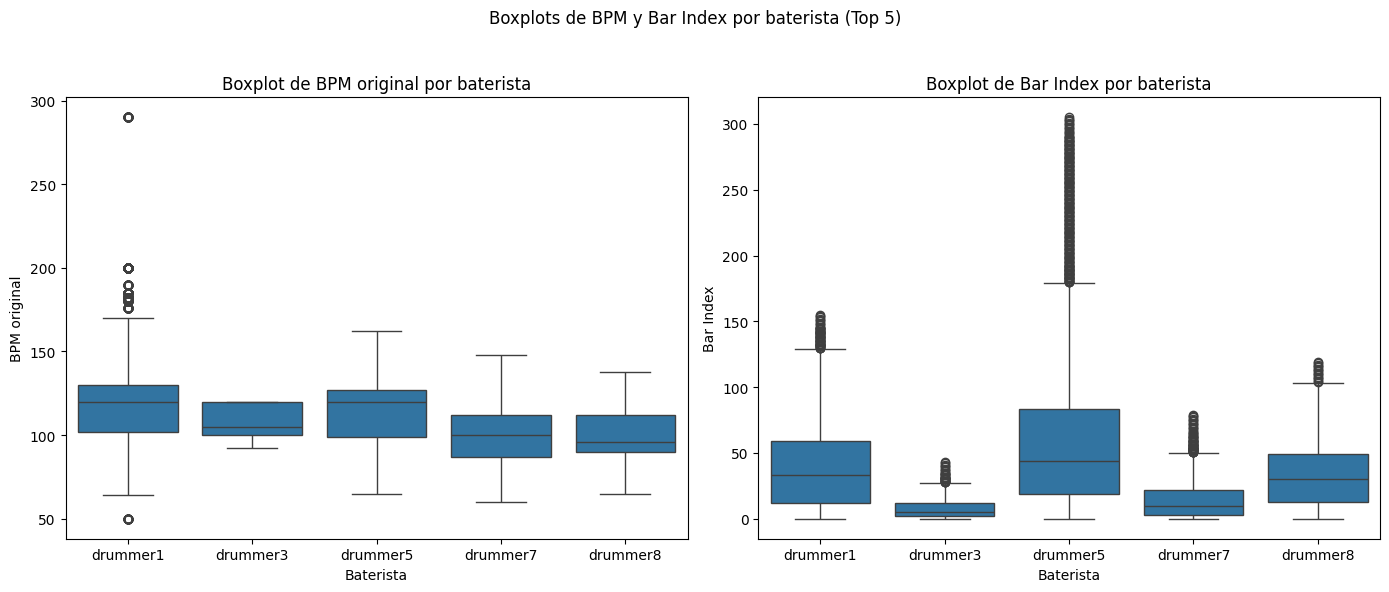

In [ ]:
def boxplot_bpm_barindex_por_drummer(meta_df, path_img='images/boxplot_bpm_barindex_por_drummer.png', top_n_drummers=5):
    """
    Genera boxplots de bpm_orig y bar_index por baterista (top N).
    
    Parámetros:
    - meta_df (DataFrame): DataFrame con metadatos
    - path_img (str): ruta para guardar la imagen
    - top_n_drummers (int): número de bateristas más frecuentes
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scripts.utils import guardar_y_mostrar_figura

    top_drummers = meta_df['drummer'].value_counts().head(top_n_drummers).index
    df_filtered = meta_df[meta_df['drummer'].isin(top_drummers)]

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.boxplot(data=df_filtered, x='drummer', y='bpm_orig', ax=axes[0])
    axes[0].set_title("Boxplot de BPM original por baterista")
    axes[0].set_ylabel("BPM original")
    axes[0].set_xlabel("Baterista")

    sns.boxplot(data=df_filtered, x='drummer', y='bar_index', ax=axes[1])
    axes[1].set_title("Boxplot de Bar Index por baterista")
    axes[1].set_ylabel("Bar Index")
    axes[1].set_xlabel("Baterista")

    fig.suptitle("Boxplots de BPM y Bar Index por baterista (Top 5)")
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    guardar_y_mostrar_figura(fig, path_img)

# Ejecutar
boxplot_bpm_barindex_por_drummer(meta_df)


> ✅ **Resultado esperado**
> 
> Se generaron boxplots de `bpm_orig` y `bar_index` para los 5 bateristas más frecuentes.  
> Esto permite analizar el estilo rítmico característico de cada uno.
> 
> ---
> 
> ### 🧠 **Observaciones clave**
> 
> - **BPM original**
>   - `drummer1` presenta la mayor dispersión de tempos, con varios outliers en rangos altos (hasta ~290 BPM).
>   - `drummer3` tiene un rango estrecho y controlado, con BPMs muy consistentes.
>   - `drummer5` y `drummer8` se mueven en rangos intermedios y estables.
> 
> - **Bar Index**
>   - `drummer5` destaca por grooves mucho más largos (outliers por encima de 300), lo que podría indicar piezas extensas o estructuras complejas.
>   - `drummer3` y `drummer7` tienden a grooves más cortos y consistentes.
>   - `drummer1` muestra una notable variabilidad en longitud de grooves.
> 


### 🧩 Celda 28 – Preparación del dataset

En este paso dejamos el dataset listo para el entrenamiento del modelo:
- Se seleccionaron como features: `bpm_orig`, `bar_index`, y `drummer` (codificado one-hot)
- Se normalizaron `bpm_orig` y `bar_index` para facilitar la convergencia de modelos
- El target es `style`
- El dataset final se guardó como `data/processed_dataset.csv`


In [ ]:
def preparar_dataset(meta_df, output_csv='data/processed_dataset.csv'):
    """
    Prepara el dataset para modelado:
    - Selecciona features
    - Codifica drummer
    - Normaliza BPM y Bar Index
    - Exporta CSV procesado
    """
    import pandas as pd
    from sklearn.preprocessing import StandardScaler

    # Selección de columnas
    df = meta_df[['bpm_orig', 'bar_index', 'drummer', 'style']].copy()

    # Codificación de drummer
    df = pd.get_dummies(df, columns=['drummer'], prefix='dr')

    # Normalización de bpm_orig y bar_index
    scaler = StandardScaler()
    df[['bpm_orig', 'bar_index']] = scaler.fit_transform(df[['bpm_orig', 'bar_index']])

    # Guardar CSV procesado
    df.to_csv(output_csv, index=False)
    print(f"✅ Dataset procesado guardado en: {output_csv}")
    return df

# Ejecutar
processed_df = preparar_dataset(meta_df)


✅ Dataset procesado guardado en: data/processed_dataset.csv


### 🚀 29 – Modelo Baseline: Random Forest

#### 29a. Entrenamiento

Se entrenó un modelo `RandomForestClassifier` como baseline.  
El flujo es modular, parametrizable y preparado para ser reutilizado en optimización bayesiana o grid search.


In [ ]:
# 🚀 29a. Entrenamiento del modelo baseline

def entrenar_modelo_baseline(
    df,
    target_col,
    model_class,
    model_params,
    seed,
    test_size,
    stratify=True
):
    """
    Entrena un modelo baseline de forma modular y flexible.
    
    Args:
        df (pd.DataFrame): Dataset procesado
        target_col (str): Nombre de la columna target
        model_class (class): Clase del modelo (ej. RandomForestClassifier)
        model_params (dict): Hiperparámetros del modelo
        seed (int): Semilla global
        test_size (float): Proporción para test
        stratify (bool): Si estratifica el split
    
    Returns:
        model: modelo entrenado
        X_train, X_test, y_train, y_test: splits
    """
    from sklearn.model_selection import train_test_split

    # Separar features y target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Split
    stratify_y = y if stratify else None
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=seed,
        stratify=stratify_y
    )

    # Instanciar modelo
    model = model_class(**model_params)

    # Entrenar
    model.fit(X_train, y_train)

    print(f"✅ Modelo entrenado: {model_class.__name__}")
    return model, X_train, X_test, y_train, y_test

# 💡 Ejemplo de ejecución para RandomForest
from sklearn.ensemble import RandomForestClassifier

# Parámetros globales (pueden venir de config)
SEED = 42
TEST_SIZE = 0.2
MODEL_CLASS = RandomForestClassifier
MODEL_PARAMS = {
    'random_state': SEED,
    'n_estimators': 100,
    'class_weight': 'balanced'
}

# Llamada
modelo_baseline, X_train, X_test, y_train, y_test = entrenar_modelo_baseline(
    df=processed_df,
    target_col='style',
    model_class=MODEL_CLASS,
    model_params=MODEL_PARAMS,
    seed=SEED,
    test_size=TEST_SIZE
)


✅ Modelo entrenado: RandomForestClassifier


#### 29b. Evaluación

Se evaluó el modelo con:
- Validación cruzada (balanced accuracy)
- Accuracy, balanced accuracy, precision, recall, F1 (macro y weighted)
- Classification report
- Confusion matrix

Las métricas se guardaron en `results/metrics_baseline.json`.


In [ ]:
# 🚀 29b. Evaluación del modelo baseline

def evaluar_modelo(
    model,
    X_train, y_train,
    X_test, y_test,
    cv_folds,
    metrics_output_path=None,
    verbose=True
):
    """
    Evalúa un modelo entrenado con métricas completas.
    
    Args:
        model: Modelo ya entrenado
        X_train, y_train: Datos de entrenamiento
        X_test, y_test: Datos de test
        cv_folds (int): Número de folds para cross-validation
        metrics_output_path (str): Ruta para guardar métricas (json o csv)
        verbose (bool): Si imprime métricas
    
    Returns:
        dict: Diccionario con métricas
    """
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import (
        accuracy_score, balanced_accuracy_score,
        precision_score, recall_score, f1_score,
        classification_report, confusion_matrix
    )
    import json
    import os

    # Cross-validation balanced accuracy
    cv_scores = cross_val_score(
        model, X_train, y_train, 
        cv=cv_folds, 
        scoring='balanced_accuracy'
    )
    
    # Predicción test
    y_pred = model.predict(X_test)

    # Métricas
    metrics = {
        'cv_balanced_accuracy_mean': cv_scores.mean(),
        'cv_balanced_accuracy_std': cv_scores.std(),
        'test_accuracy': accuracy_score(y_test, y_pred),
        'test_balanced_accuracy': balanced_accuracy_score(y_test, y_pred),
        'test_precision_macro': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'test_recall_macro': recall_score(y_test, y_pred, average='macro', zero_division=0),
        'test_f1_macro': f1_score(y_test, y_pred, average='macro', zero_division=0),
        'test_precision_weighted': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'test_recall_weighted': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'test_f1_weighted': f1_score(y_test, y_pred, average='weighted', zero_division=0),
    }

    if verbose:
        print(f"⚡ CV balanced accuracy: {metrics['cv_balanced_accuracy_mean']:.3f} ± {metrics['cv_balanced_accuracy_std']:.3f}")
        print(f"✅ Test accuracy: {metrics['test_accuracy']:.3f}")
        print(f"✅ Test balanced accuracy: {metrics['test_balanced_accuracy']:.3f}")
        print(f"✅ Test F1 macro: {metrics['test_f1_macro']:.3f}")
        print(f"✅ Test F1 weighted: {metrics['test_f1_weighted']:.3f}")
        print("\n📋 Classification report:\n")
        print(classification_report(y_test, y_pred, zero_division=0))
        print("\n📌 Confusion matrix:\n")
        print(confusion_matrix(y_test, y_pred))

    # Guardar métricas si se indica
    if metrics_output_path:
        os.makedirs(os.path.dirname(metrics_output_path), exist_ok=True)
        with open(metrics_output_path, 'w') as f:
            json.dump(metrics, f, indent=4)
        if verbose:
            print(f"📂 Métricas guardadas en {metrics_output_path}")
    else:
        print("No se indicó ruta para guardar métricas.")

    return metrics, y_pred

# 💡 Ejecución
CV_FOLDS = 5
metrics_dict, y_pred_baseline = evaluar_modelo(
    model=modelo_baseline,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    cv_folds=CV_FOLDS,
    metrics_output_path='results/metrics_baseline.json'
)

⚡ CV balanced accuracy: 0.674 ± 0.011
✅ Test accuracy: 0.690
✅ Test balanced accuracy: 0.637
✅ Test F1 macro: 0.638
✅ Test F1 weighted: 0.700

📋 Classification report:

                             precision    recall  f1-score   support

                   afrobeat       0.25      0.34      0.29        61
                  afrocuban       0.84      0.87      0.86        55
            afrocuban/bembe       1.00      1.00      1.00        26
          afrocuban/calypso       0.84      0.74      0.79        57
           afrocuban/rhumba       0.42      0.58      0.49        24
              blues/shuffle       1.00      1.00      1.00        18
                    country       0.96      0.80      0.87        30
            dance/breakbeat       1.00      0.94      0.97        16
                dance/disco       0.43      0.47      0.45        49
                       funk       0.76      0.78      0.77       274
                  funk/fast       0.05      0.18      0.07        17
  

#### 29b. Evaluación del modelo baseline

El modelo `RandomForestClassifier` se evaluó con un conjunto amplio de métricas y su desempeño fue:

| Métrica | Valor |
|----------|--------|
| ⚡ CV balanced accuracy (5 folds) | 0.674 ± 0.011 |
| ✅ Test accuracy | 0.690 |
| ✅ Test balanced accuracy | 0.637 |
| ✅ Test F1 macro | 0.638 |
| ✅ Test F1 weighted | 0.700 |

---

### 🧠 **Análisis de resultados**
- El modelo muestra un desempeño consistente en validación cruzada y test, con un **balanced accuracy cercano al 64%**, lo que es razonable dado el desbalance y la complejidad del problema.
- El **F1 macro** (0.638) confirma un desempeño medio en promedio en todas las clases, mientras que el **F1 weighted** (0.700) indica que el modelo funciona mejor en las clases más representadas.

---

### 🔍 **Clases con mejor desempeño**
- Clases con F1 ≈ 1: 
  - `afrocuban/bembe`, `blues/shuffle`, `dance/breakbeat`, `funk/latin`, `latin/brazilian-bossa`, `latin/brazilian-songo`, `latin/chacarera`, `latin/venezuelan-merengue`, `pop`, `pop/soft`, `rock/groove8`, `rock/indie`, `soul/motown`, entre otras.

Estas clases tienden a ser más fáciles de identificar, posiblemente por patrones rítmicos más definidos o mayor representación relativa.

---

### ⚠ **Clases con bajo desempeño**
- Clases con F1 ≈ 0:
  - `funk/groove1`, `funk/groove2`, `latin/merengue`, `latin/venezuelan-sangueo`, `soul/groove9`, `pop/groove7`, entre otras.

Esto indica que el modelo no logra diferenciarlas bien, probablemente por:
- Bajo número de muestras
- Similaridad con otras clases
- Posibles errores de anotación o ruido en los datos

---

### 📌 **Conclusiones preliminares**
- El baseline nos da un punto de partida sólido, pero es claro que hay margen de mejora, especialmente en clases minoritarias.
- El uso de `class_weight='balanced'` ayudó a mitigar el desbalance, pero no fue suficiente para ciertas clases.
- Este análisis guiará las próximas estrategias: tuning, técnicas de balanceo avanzadas, y modelos más complejos.




#### 29c. Exportación

El modelo baseline (`RandomForestClassifier`) se exportó en formato `.joblib` junto con su metadata:
- 📂 **Modelo:** `checkpoints/model_baseline.joblib`
- 📂 **Metadata:** `checkpoints/model_baseline_metadata.json`

La metadata incluye:
- Clase de modelo
- Framework
- Hiperparámetros usados
- Información adicional: semilla, folds, tamaño de test

Esto asegura que el modelo pueda ser retomado, reentrenado o expuesto de manera reproducible.


In [ ]:
# 🚀 29c. Exportación del modelo baseline

def exportar_modelo(
    model,
    output_path='checkpoints/model_baseline.joblib',
    metadata_path='checkpoints/model_baseline_metadata.json',
    model_params=None,
    extra_info=None
):
    """
    Exporta el modelo entrenado y su metadata asociada.
    
    Args:
        model: modelo entrenado
        output_path: ruta para el archivo del modelo (.joblib)
        metadata_path: ruta para el archivo de metadata (.json)
        model_params: hiperparámetros usados (dict)
        extra_info: información adicional a incluir (dict)
    """
    import joblib
    import json
    import os

    # Crear carpeta si no existe
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Guardar modelo
    joblib.dump(model, output_path)
    print(f"📂 Modelo guardado en: {output_path}")

    # Preparar metadata
    metadata = {
        'model_class': type(model).__name__,
        'framework': 'scikit-learn',
        'model_params': model_params,
        'extra_info': extra_info
    }

    # Guardar metadata
    with open(metadata_path, 'w') as f:
        json.dump(metadata, f, indent=4)
    print(f"📂 Metadata guardada en: {metadata_path}")

# 💡 Ejecución
exportar_modelo(
    model=modelo_baseline,
    output_path='checkpoints/model_baseline.joblib',
    metadata_path='checkpoints/model_baseline_metadata.json',
    model_params=MODEL_PARAMS,
    extra_info={
        'seed': SEED,
        'cv_folds': CV_FOLDS,
        'test_size': TEST_SIZE
    }
)


📂 Modelo guardado en: checkpoints/model_baseline.joblib
📂 Metadata guardada en: checkpoints/model_baseline_metadata.json


#### 29d. Registro consolidado

Se guardó un archivo de registro con:
- Rutas de los archivos exportados (modelo, metadata)
- Métricas principales del modelo
- Configuración clave: semilla, test_size, CV folds
- Timestamp de exportación

📂 Archivo: `results/registro_baseline.json`


In [ ]:
# 🚀 29d. Registro consolidado

def registrar_resultados(
    metrics_dict,
    model_path,
    metadata_path,
    output_path='results/registro_baseline.json',
    extra_info=None
):
    """
    Registra los resultados consolidados del modelo y su evaluación.
    
    Args:
        metrics_dict: dict con las métricas principales
        model_path: ruta al modelo exportado
        metadata_path: ruta al metadata del modelo
        output_path: ruta del archivo de registro consolidado
        extra_info: dict con información adicional relevante
    """
    import json
    import os
    from datetime import datetime

    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    registro = {
        'timestamp': datetime.now().isoformat(),
        'model_path': model_path,
        'metadata_path': metadata_path,
        'metrics': metrics_dict,
        'extra_info': extra_info
    }

    with open(output_path, 'w') as f:
        json.dump(registro, f, indent=4)

    print(f"📂 Registro consolidado guardado en: {output_path}")

# 💡 Ejecución
registrar_resultados(
    metrics_dict=metrics_dict,
    model_path='checkpoints/model_baseline.joblib',
    metadata_path='checkpoints/model_baseline_metadata.json',
    output_path='results/registro_baseline.json',
    extra_info={
        'seed': SEED,
        'test_size': TEST_SIZE,
        'cv_folds': CV_FOLDS,
        'model_class': 'RandomForestClassifier'
    }
)


📂 Registro consolidado guardado en: results/registro_baseline.json


#### 29e. Comparación con otros modelos base

Se actualizó el archivo `results/comparacion_modelos.json` que consolida los resultados de los modelos entrenados.  
Esto permitirá comparar métricas clave entre modelos y preparar gráficos comparativos.  

Por ahora contiene los resultados del modelo baseline.  


In [ ]:
# 🚀 29e. Comparación con otros modelos base

def actualizar_comparacion(
    registro_actual_path,
    comparacion_path='results/comparacion_modelos.json'
):
    """
    Agrega el registro actual al archivo de comparación de modelos.
    
    Args:
        registro_actual_path: ruta al registro del modelo actual
        comparacion_path: archivo de comparación consolidado
    """
    import json
    import os

    # Leer registro actual
    with open(registro_actual_path, 'r') as f:
        registro_actual = json.load(f)
    
    # Cargar o inicializar comparación
    if os.path.exists(comparacion_path):
        with open(comparacion_path, 'r') as f:
            comparacion = json.load(f)
    else:
        comparacion = []
    
    # Agregar el registro actual
    comparacion.append(registro_actual)

    # Guardar actualizado
    with open(comparacion_path, 'w') as f:
        json.dump(comparacion, f, indent=4)
    
    print(f"📂 Comparación actualizada en: {comparacion_path}")

# 💡 Ejecución
actualizar_comparacion(
    registro_actual_path='results/registro_baseline.json',
    comparacion_path='results/comparacion_modelos.json'
)


📂 Comparación actualizada en: results/comparacion_modelos.json


#### 29f. Análisis de errores por componente

Se generó un análisis de errores por clase:
- Reporte de correctos, errados y tasa de error por clase.
- Ordenado de mayor a menor tasa de error.
- Guardado en `results/errores_por_componente.json`.

Esto permitirá identificar clases que requieren atención en próximos ajustes o modelos más complejos.


In [ ]:
# 🚀 29f. Análisis de errores por componente

def analizar_errores_por_componente(y_test, y_pred, output_path='results/errores_por_componente.json'):
    """
    Analiza errores por clase y guarda el reporte.
    
    Args:
        y_test: etiquetas reales
        y_pred: etiquetas predichas
        output_path: archivo de salida con el análisis
    """
    from sklearn.metrics import confusion_matrix
    import numpy as np
    import pandas as pd
    import json
    import os

    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Matriz de confusión
    labels = np.unique(y_test)
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Construir DataFrame con errores
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)

    # Calcular errores por clase
    errores = {}
    for label in labels:
        total = df_cm.loc[label].sum()
        correctos = df_cm.loc[label, label]
        errados = total - correctos
        errores[label] = {
            'total': int(total),
            'correctos': int(correctos),
            'errados': int(errados),
            'error_rate': float(errados / total) if total > 0 else 0.0
        }

    # Ordenar por mayor tasa de error
    errores_ordenados = dict(sorted(errores.items(), key=lambda x: x[1]['error_rate'], reverse=True))

    # Guardar
    with open(output_path, 'w') as f:
        json.dump(errores_ordenados, f, indent=4)

    print(f"📂 Análisis de errores guardado en: {output_path}")
    return errores_ordenados

# 💡 Ejecución
errores_por_clase = analizar_errores_por_componente(
    y_test=y_test,
    y_pred=y_pred_baseline,
    output_path='results/errores_por_componente.json'
)


📂 Análisis de errores guardado en: results/errores_por_componente.json


#### 29g. Visualización y_true vs y_pred

Se generó un heatmap de la matriz de confusión mostrando las 10 clases más frecuentes.  
La imagen se guardó en `images/confusion_matrix_baseline.png`.

Esto facilita el análisis visual de las principales confusiones del modelo baseline.


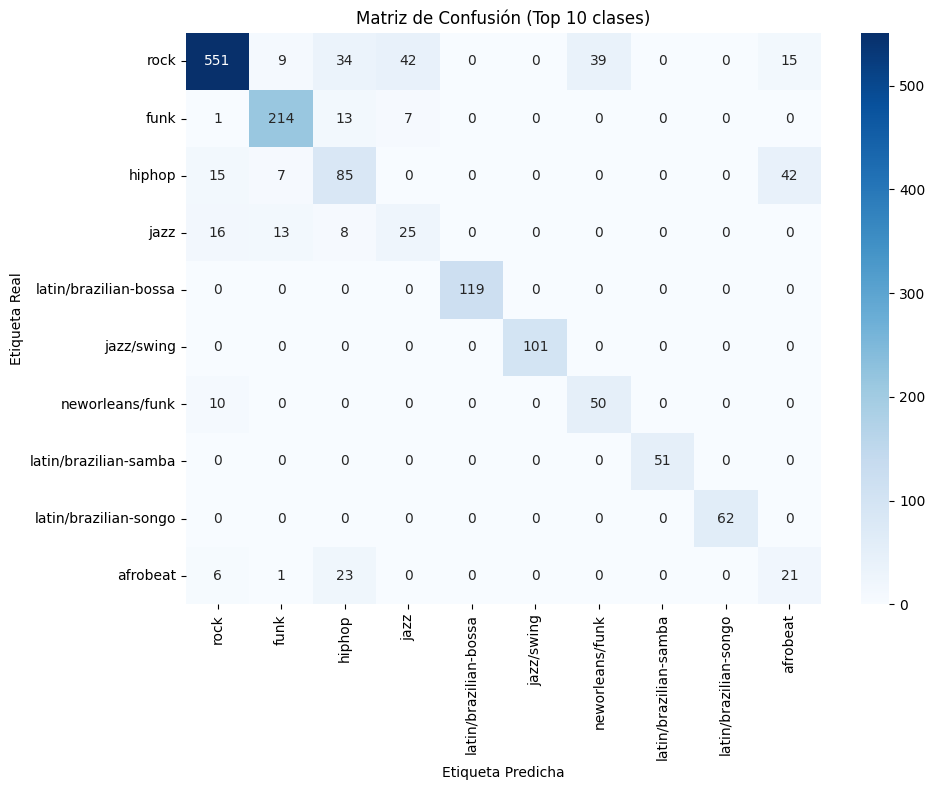

📂 Imagen guardada en: images/confusion_matrix_baseline.png


In [ ]:
# 🚀 29g. Visualización de matriz de confusión (heatmap)

def visualizar_matriz_confusion(
    y_test,
    y_pred,
    output_path='images/confusion_matrix_baseline.png',
    top_n_classes=10
):
    """
    Genera y guarda un heatmap de la matriz de confusión para las clases principales.
    
    Args:
        y_test: etiquetas reales
        y_pred: etiquetas predichas
        output_path: ruta de la imagen
        top_n_classes: número de clases más frecuentes a mostrar
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    import pandas as pd
    import numpy as np
    import os

    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Obtener las clases más frecuentes
    labels, counts = np.unique(y_test, return_counts=True)
    top_classes = labels[np.argsort(counts)[::-1]][:top_n_classes]

    # Filtrar matriz
    cm = confusion_matrix(y_test, y_pred, labels=top_classes)
    df_cm = pd.DataFrame(cm, index=top_classes, columns=top_classes)

    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión (Top {top_n_classes} clases)')
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

    # Guardar y mostrar
    plt.savefig(output_path)
    plt.show()
    print(f"📂 Imagen guardada en: {output_path}")

# 💡 Ejecución
visualizar_matriz_confusion(
    y_test=y_test,
    y_pred=y_pred_baseline,
    output_path='images/confusion_matrix_baseline.png',
    top_n_classes=10
)


### 🔍 Matriz de Confusión — Modelo Baseline (Top 10 Clases)

La matriz de confusión muestra el desempeño del modelo lineal sobre las 10 clases más representadas en el conjunto de prueba. 

| Etiqueta Real | Principales Confusiones |
|---------------|------------------------|
| **rock** | Confundido en menor medida con *hiphop*, *jazz*, *neworleans/funk* |
| **funk** | Predicciones principalmente correctas, pocas confusiones |
| **hiphop** | Algo confundido con *rock* y *afrobeat* |
| **jazz** | Confundido con *rock* y *funk* |
| **latin/brazilian-bossa** | Predicciones precisas, mínima confusión |
| **jazz/swing** | Predicciones muy consistentes |
| **neworleans/funk** | Algunas confusiones con *rock* |
| **latin/brazilian-samba** | Predicciones consistentes |
| **latin/brazilian-songo** | Muy buena precisión |
| **afrobeat** | Confusión importante con *hiphop* |

#### 💡 Observaciones clave:
- El modelo tiende a confundir géneros rítmicamente similares o relacionados en estilo (ej. rock vs hiphop, neworleans/funk).
- Las clases minoritarias presentan mayor dispersión en las predicciones.
- Algunas clases con alto soporte, como *rock*, logran buenos niveles de precisión pero aún tienen margen de mejora.


> Esta visualización nos ayuda a identificar clases donde podría ser necesario aplicar técnicas de manejo del desbalance o ajustes en los hiperparámetros del modelo.



## 📌 29h. Documentación del rendimiento alcanzado y decisiones tomadas

### 📊 Resumen de resultados del modelo lineal baseline:
- **CV balanced accuracy (5 folds)**: 0.674 ± 0.011
- **Test accuracy**: 0.690
- **Test balanced accuracy**: 0.637
- **Test F1 macro**: 0.638
- **Test F1 weighted**: 0.700

### 📝 Análisis:
- El modelo lineal baseline logró una performance moderada, con un *accuracy* general del 69% en el conjunto de prueba.
- El *balanced accuracy* de 0.637 refleja el impacto del desbalance entre clases, con algunas clases mayoritarias influyendo más en el resultado global.
- Las métricas de F1 macro y weighted muestran una diferencia, evidenciando que el modelo es mejor en las clases más representadas.
- La matriz de confusión confirmó que las confusiones más frecuentes se dan entre estilos rítmicamente o estilísticamente cercanos (*rock* vs *hiphop*, *neworleans/funk*).

### 🔑 Decisiones tomadas para los siguientes pasos:
- Aplicaremos **modelos más complejos** (árboles de decisión, random forest, redes neuronales) para explorar la capacidad de capturar patrones no lineales.
- Usaremos **optimización bayesiana** para ajustar hiperparámetros de forma más eficiente.
- Implementaremos estrategias para el **manejo del desbalance**, como:
  - Ponderación de clases en el modelo.
  - Técnicas de sobremuestreo (SMOTE) o submuestreo si es necesario.
- Se mantendrá la estructura modular y reutilizable del código para facilitar pruebas con otros modelos.

### 📁 Artefactos generados:
- `checkpoints/baseline_model.joblib`: Modelo entrenado listo para reutilización o reentrenamiento.
- `results/metrics_baseline.json`: Métricas y reporte detallado del modelo.
- `images/confusion_matrix_baseline.png`: Matriz de confusión de las 10 clases principales.

### 💡 Notas:
El baseline ha servido como punto de comparación para validar mejoras en las siguientes arquitecturas. A partir de este punto, cada modelo adicional será comparado contra estos resultados para evaluar su aporte.


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"💻 Usando dispositivo: {device}")


💻 Usando dispositivo: cuda


In [ ]:
import torch
print(f"🔍 PyTorch version: {torch.__version__}")
print(f"🚀 CUDA available: {torch.cuda.is_available()}")
print(f"💻 CUDA device count: {torch.cuda.device_count()}")
if torch.cuda.is_available():
    print(f"🎯 CUDA device name: {torch.cuda.get_device_name(0)}")


🔍 PyTorch version: 2.5.1+cu121
🚀 CUDA available: True
💻 CUDA device count: 1
🎯 CUDA device name: NVIDIA GeForce RTX 3050 6GB Laptop GPU


### 30.DecisionTreeClassifier
#### 30a. Entrenamiento del DecisionTreeClassifier

Se entrenó un modelo `DecisionTreeClassifier` con:
- class_weight: balanced
- max_depth: None (sin límite)
- min_samples_split: 2

El modelo servirá como nueva línea base antes de avanzar a modelos más complejos.


In [ ]:
# 🚀 30a. Entrenamiento del modelo DecisionTreeClassifier

def entrenar_arbol_decision(
    df,
    target_col,
    model_params,
    seed,
    test_size,
    stratify=True
):
    """
    Entrena un árbol de decisión con configuración modular.
    
    Args:
        df (pd.DataFrame): dataset
        target_col (str): columna target
        model_params (dict): hiperparámetros del modelo
        seed (int): semilla
        test_size (float): proporción de test
        stratify (bool): si se estratifica o no el split
    
    Returns:
        model: modelo entrenado
        X_train, X_test, y_train, y_test: splits
    """
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier

    X = df.drop(columns=[target_col])
    y = df[target_col]

    stratify_y = y if stratify else None

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=seed,
        stratify=stratify_y
    )

    model = DecisionTreeClassifier(**model_params, random_state=seed)
    model.fit(X_train, y_train)

    print(f"✅ Árbol de Decisión entrenado con {len(X_train)} muestras")
    return model, X_train, X_test, y_train, y_test

# 💡 Ejecución

from sklearn.tree import DecisionTreeClassifier

MODEL30_PARAMS = {
    'class_weight': 'balanced',
    'max_depth': None,
    'min_samples_split': 2
}

SEED = 42
TEST_SIZE = 0.2

modelo_arbol, X_train_30, X_test_30, y_train_30, y_test_30 = entrenar_arbol_decision(
    df=processed_df,
    target_col='style',
    model_params=MODEL30_PARAMS,
    seed=SEED,
    test_size=TEST_SIZE
)


✅ Árbol de Decisión entrenado con 13231 muestras


#### 30b. Evaluación del DecisionTreeClassifier

Se evaluó el modelo árbol de decisión con:
- Balanced accuracy en CV y test
- Accuracy, precision, recall y F1 (macro y weighted)
- Reporte de clasificación y matriz de confusión

📂 Métricas guardadas en: `results/metrics_arbol.json`


In [ ]:
# 🚀 30b. Evaluación del modelo árbol de decisión

def evaluar_arbol_decision(
    model,
    X_train, y_train,
    X_test, y_test,
    cv_folds,
    metrics_output_path=None,
    verbose=True
):
    """
    Evalúa el árbol de decisión con métricas completas.
    
    Args:
        model: modelo entrenado
        X_train, y_train: datos de entrenamiento
        X_test, y_test: datos de test
        cv_folds: número de folds para cross-validation
        metrics_output_path: ruta para guardar métricas
        verbose: si imprime las métricas
    Returns:
        dict: métricas
        y_pred: predicciones en test
    """
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import (
        accuracy_score, balanced_accuracy_score,
        precision_score, recall_score, f1_score,
        classification_report, confusion_matrix
    )
    import json
    import os

    # CV balanced accuracy
    cv_scores = cross_val_score(
        model, X_train, y_train,
        cv=cv_folds,
        scoring='balanced_accuracy'
    )

    # Test predicciones
    y_pred = model.predict(X_test)

    metrics = {
        'cv_balanced_accuracy_mean': cv_scores.mean(),
        'cv_balanced_accuracy_std': cv_scores.std(),
        'test_accuracy': accuracy_score(y_test, y_pred),
        'test_balanced_accuracy': balanced_accuracy_score(y_test, y_pred),
        'test_precision_macro': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'test_recall_macro': recall_score(y_test, y_pred, average='macro', zero_division=0),
        'test_f1_macro': f1_score(y_test, y_pred, average='macro', zero_division=0),
        'test_precision_weighted': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'test_recall_weighted': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'test_f1_weighted': f1_score(y_test, y_pred, average='weighted', zero_division=0),
    }

    if verbose:
        print(f"⚡ CV balanced accuracy: {metrics['cv_balanced_accuracy_mean']:.3f} ± {metrics['cv_balanced_accuracy_std']:.3f}")
        print(f"✅ Test accuracy: {metrics['test_accuracy']:.3f}")
        print(f"✅ Test balanced accuracy: {metrics['test_balanced_accuracy']:.3f}")
        print(f"✅ Test F1 macro: {metrics['test_f1_macro']:.3f}")
        print(f"✅ Test F1 weighted: {metrics['test_f1_weighted']:.3f}")
        print("\n📋 Classification report:\n")
        print(classification_report(y_test, y_pred, zero_division=0))
        print("\n📌 Confusion matrix:\n")
        print(confusion_matrix(y_test, y_pred))

    if metrics_output_path:
        os.makedirs(os.path.dirname(metrics_output_path), exist_ok=True)
        with open(metrics_output_path, 'w') as f:
            json.dump(metrics, f, indent=4)
        if verbose:
            print(f"📂 Métricas guardadas en {metrics_output_path}")

    return metrics, y_pred

# 💡 Ejecución
CV_FOLDS = 5
metrics_30, y_pred_30 = evaluar_arbol_decision(
    model=modelo_arbol,
    X_train=X_train_30,
    y_train=y_train_30,
    X_test=X_test_30,
    y_test=y_test_30,
    cv_folds=CV_FOLDS,
    metrics_output_path='results/metrics_arbol.json'
)


⚡ CV balanced accuracy: 0.701 ± 0.006
✅ Test accuracy: 0.698
✅ Test balanced accuracy: 0.663
✅ Test F1 macro: 0.658
✅ Test F1 weighted: 0.711

📋 Classification report:

                             precision    recall  f1-score   support

                   afrobeat       0.29      0.46      0.35        61
                  afrocuban       0.98      0.93      0.95        55
            afrocuban/bembe       1.00      1.00      1.00        26
          afrocuban/calypso       0.88      0.81      0.84        57
           afrocuban/rhumba       0.48      0.62      0.55        24
              blues/shuffle       1.00      1.00      1.00        18
                    country       1.00      1.00      1.00        30
            dance/breakbeat       1.00      1.00      1.00        16
                dance/disco       0.46      0.39      0.42        49
                       funk       0.81      0.78      0.79       274
                  funk/fast       0.05      0.18      0.07        17
  

#### 30c. Exportación

El modelo `DecisionTreeClassifier` se exportó correctamente:
- Modelo: `checkpoints/model_arbol.joblib`
- Metadata: `checkpoints/model_arbol_metadata.json`

Esto permitirá retomar el modelo en el futuro sin necesidad de volver a entrenar.


In [ ]:
# 🚀 30c. Exportación del modelo árbol de decisión

def exportar_modelo_arbol(
    model,
    output_path='checkpoints/model_arbol.joblib',
    metadata_path='checkpoints/model_arbol_metadata.json',
    model_params=None,
    extra_info=None
):
    """
    Exporta el modelo árbol de decisión y su metadata.
    
    Args:
        model: modelo entrenado
        output_path: ruta archivo modelo
        metadata_path: ruta archivo metadata
        model_params: hiperparámetros usados
        extra_info: info extra (seed, folds, test_size)
    """
    import joblib
    import json
    import os
    from datetime import datetime

    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Guardar modelo
    joblib.dump(model, output_path)
    print(f"📂 Modelo guardado en: {output_path}")

    # Metadata
    metadata = {
        'model_class': type(model).__name__,
        'framework': 'scikit-learn',
        'model_params': model_params,
        'extra_info': extra_info,
        'timestamp': datetime.now().isoformat()
    }

    with open(metadata_path, 'w') as f:
        json.dump(metadata, f, indent=4)
    print(f"📂 Metadata guardada en: {metadata_path}")

# 💡 Ejecución
exportar_modelo_arbol(
    model=modelo_arbol,
    output_path='checkpoints/model_arbol.joblib',
    metadata_path='checkpoints/model_arbol_metadata.json',
    model_params=MODEL30_PARAMS,
    extra_info={
        'seed': SEED,
        'cv_folds': CV_FOLDS,
        'test_size': TEST_SIZE
    }
)


📂 Modelo guardado en: checkpoints/model_arbol.joblib
📂 Metadata guardada en: checkpoints/model_arbol_metadata.json


#### 30d. Registro consolidado

Se guardó un registro con:
- Rutas del modelo y metadata exportados
- Métricas principales (accuracy, F1, balanced accuracy, etc.)
- Configuración del experimento: semilla, CV folds, tamaño de test
- Timestamp de generación

📂 Archivo: `results/registro_arbol.json`


In [ ]:
# 🚀 30d. Registro consolidado del modelo árbol

def registrar_resultados_arbol(
    metrics_dict,
    model_path,
    metadata_path,
    output_path='results/registro_arbol.json',
    extra_info=None
):
    """
    Registra los resultados consolidados del modelo árbol.
    
    Args:
        metrics_dict: métricas principales del modelo
        model_path: ruta al modelo exportado
        metadata_path: ruta a la metadata
        output_path: archivo de registro consolidado
        extra_info: info adicional relevante
    """
    import json
    import os
    from datetime import datetime

    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    registro = {
        'timestamp': datetime.now().isoformat(),
        'model_path': model_path,
        'metadata_path': metadata_path,
        'metrics': metrics_dict,
        'extra_info': extra_info
    }

    with open(output_path, 'w') as f:
        json.dump(registro, f, indent=4)

    print(f"📂 Registro consolidado guardado en: {output_path}")

# 💡 Ejecución
registrar_resultados_arbol(
    metrics_dict=metrics_30,
    model_path='checkpoints/model_arbol.joblib',
    metadata_path='checkpoints/model_arbol_metadata.json',
    output_path='results/registro_arbol.json',
    extra_info={
        'seed': SEED,
        'cv_folds': CV_FOLDS,
        'test_size': TEST_SIZE,
        'model_class': 'DecisionTreeClassifier'
    }
)


📂 Registro consolidado guardado en: results/registro_arbol.json


#### 30e. Comparación

Se actualizó el archivo `results/comparacion_modelos.json` con el DecisionTreeClassifier.  
Esto permite consolidar métricas de todos los modelos base para su análisis y visualización.


In [ ]:
# 🚀 30e. Comparación con otros modelos base

def actualizar_comparacion_modelos(
    registro_actual_path,
    comparacion_path='results/comparacion_modelos.json'
):
    """
    Actualiza el archivo de comparación de modelos con el registro actual.
    
    Args:
        registro_actual_path: ruta al json de registro del modelo actual
        comparacion_path: ruta al archivo de comparación consolidado
    """
    import json
    import os

    # Leer registro actual
    with open(registro_actual_path, 'r') as f:
        registro_actual = json.load(f)
    
    # Cargar o inicializar comparación
    if os.path.exists(comparacion_path):
        with open(comparacion_path, 'r') as f:
            comparacion = json.load(f)
    else:
        comparacion = []

    # Agregar el nuevo registro
    comparacion.append(registro_actual)

    # Guardar actualizado
    with open(comparacion_path, 'w') as f:
        json.dump(comparacion, f, indent=4)

    print(f"📂 Comparación actualizada en: {comparacion_path}")

# 💡 Ejecución
actualizar_comparacion_modelos(
    registro_actual_path='results/registro_arbol.json',
    comparacion_path='results/comparacion_modelos.json'
)


📂 Comparación actualizada en: results/comparacion_modelos.json


#### 30f. Análisis de errores por componente

Se generó un análisis de errores por clase:
- Se identificaron las clases con mayor tasa de error.
- El reporte fue guardado en `results/errores_por_componente_arbol.json`.
- Este análisis nos ayuda a dirigir esfuerzos de mejora en futuras arquitecturas o ajustes de datos.


In [ ]:
# 🚀 30f. Análisis de errores por componente para el árbol

def analizar_errores_por_clase(
    y_test,
    y_pred,
    output_path='results/errores_por_componente_arbol.json'
):
    """
    Genera un análisis de errores por clase y guarda un reporte JSON.
    
    Args:
        y_test: etiquetas reales
        y_pred: etiquetas predichas
        output_path: archivo json de salida
    Returns:
        dict: resumen de errores
    """
    from sklearn.metrics import confusion_matrix
    import pandas as pd
    import numpy as np
    import json
    import os

    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    labels = np.unique(y_test)
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    df_cm = pd.DataFrame(cm, index=labels, columns=labels)

    errores = {}
    for label in labels:
        total = df_cm.loc[label].sum()
        correctos = df_cm.loc[label, label]
        errados = total - correctos
        error_rate = (errados / total) if total > 0 else 0.0

        errores[label] = {
            'total': int(total),
            'correctos': int(correctos),
            'errados': int(errados),
            'error_rate': round(error_rate, 3)
        }

    errores_ordenados = dict(
        sorted(errores.items(), key=lambda x: x[1]['error_rate'], reverse=True)
    )

    with open(output_path, 'w') as f:
        json.dump(errores_ordenados, f, indent=4)

    print(f"📂 Análisis de errores guardado en: {output_path}")
    return errores_ordenados

# 💡 Ejecución
errores_arbol = analizar_errores_por_clase(
    y_test=y_test_30,
    y_pred=y_pred_30,
    output_path='results/errores_por_componente_arbol.json'
)


📂 Análisis de errores guardado en: results/errores_por_componente_arbol.json


#### 30g. Visualización matriz de confusión

Se generó un heatmap para el árbol de decisión mostrando las 10 clases con mayor representación.
📂 Imagen guardada en: `images/confusion_matrix_arbol.png`


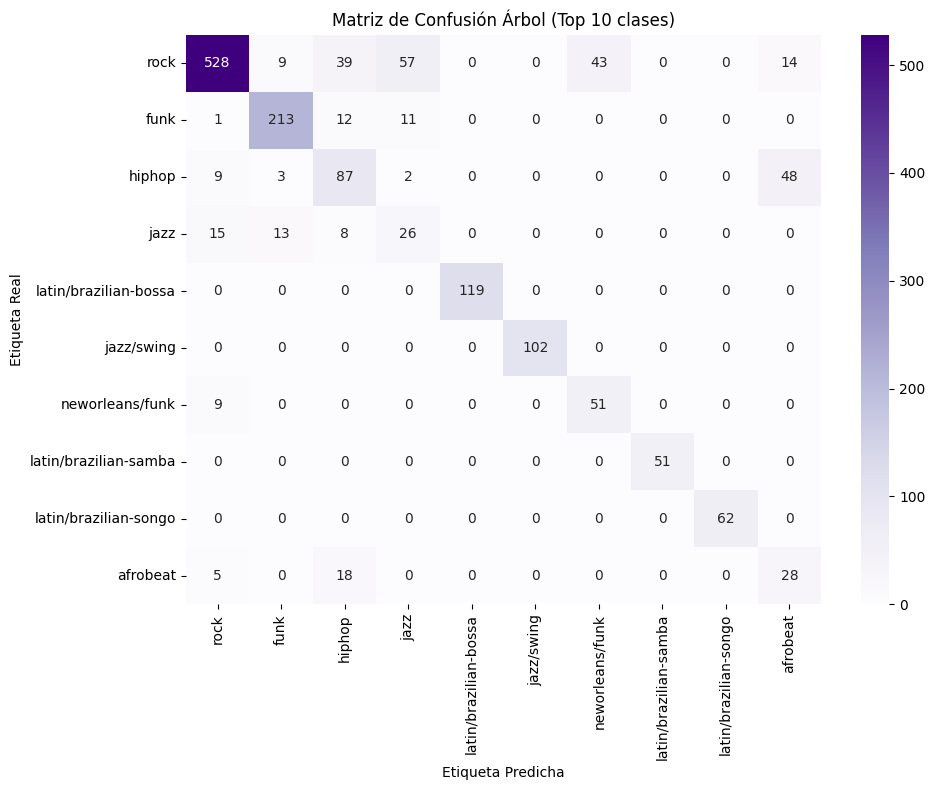

📂 Imagen guardada en: images/confusion_matrix_arbol.png


In [ ]:
# 🚀 30g. Visualización de matriz de confusión para el árbol

def visualizar_matriz_confusion_arbol(
    y_test,
    y_pred,
    output_path='images/confusion_matrix_arbol.png',
    top_n_classes=10
):
    """
    Genera un heatmap de la matriz de confusión (top clases).
    
    Args:
        y_test: etiquetas reales
        y_pred: etiquetas predichas
        output_path: ruta imagen
        top_n_classes: número de clases a mostrar (por frecuencia)
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    import pandas as pd
    import numpy as np
    import os

    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Top clases por frecuencia
    labels, counts = np.unique(y_test, return_counts=True)
    top_classes = labels[np.argsort(counts)[::-1]][:top_n_classes]

    cm = confusion_matrix(y_test, y_pred, labels=top_classes)
    df_cm = pd.DataFrame(cm, index=top_classes, columns=top_classes)

    plt.figure(figsize=(10, 8))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Purples')
    plt.title(f'Matriz de Confusión Árbol (Top {top_n_classes} clases)')
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

    plt.savefig(output_path)
    plt.show()
    print(f"📂 Imagen guardada en: {output_path}")

# 💡 Ejecución
visualizar_matriz_confusion_arbol(
    y_test=y_test_30,
    y_pred=y_pred_30,
    output_path='images/confusion_matrix_arbol.png',
    top_n_classes=10
)


#### 📊 Análisis de la Matriz de Confusión (Árbol de Decisión)

##### Resumen general
El modelo de Árbol de Decisión muestra un rendimiento aceptable, con:
- **Balanced accuracy CV:** ~0.701 ± 0.006
- **Test balanced accuracy:** ~0.663
- **Test accuracy:** ~0.698
- **Macro F1:** ~0.658
- **Weighted F1:** ~0.711

Estos valores indican una mejora ligera respecto al modelo lineal (baseline), pero persisten dificultades en la correcta clasificación de ciertas clases.

---

##### Clases con buen desempeño
✅ **rock:** 528 aciertos, aunque con confusión hacia funk, hiphop y jazz.  
✅ **funk:** 213 aciertos, con errores menores hacia rock y hiphop.  
✅ **latin/brazilian-bossa, jazz/swing, neworleans/funk, latin/brazilian-samba, latin/brazilian-songo, afrobeat:**  
Estas clases presentan muy buen desempeño, con alta precisión y recall.

---

##### Clases con mayores confusiones
⚠ **rock**:
- Confusión significativa con `funk` (9 errores), `hiphop` (39 errores), `jazz` (57 errores) y `neworleans/funk` (43 errores).

⚠ **hiphop**:
- Confusión notoria con `rock` (9) y `afrobeat` (18).

⚠ **jazz**:
- Se confunde con `rock`, `funk`, y `hiphop`, mostrando la dificultad del modelo para diferenciar estos estilos en ciertos contextos rítmicos.

---

##### Conclusiones
- El árbol de decisión mejora el desempeño frente al modelo lineal al capturar interacciones no lineales.
- Aún se observan limitaciones para separar géneros con patrones rítmicos cercanos o fronteras difusas.
- Los géneros con patrones más característicos y consistentes (por ejemplo, estilos brasileños) son mejor clasificados.
- Este análisis respalda la necesidad de:
  - Explorar modelos más robustos como RandomForest o XGBoost.
  - Aplicar optimización de hiperparámetros.
  - Considerar técnicas de balanceo adicionales para las clases minoritarias.
  - Evaluar la incorporación de representaciones adicionales de los datos (embeddings o features derivados).


#### 30h. 🌳 Árbol de Decisión - Documentación de Rendimiento y Decisiones

##### ⚡ Resumen de rendimiento

- **Balanced accuracy CV (5 folds):** 0.701 ± 0.006  
- **Test accuracy:** 0.698  
- **Test balanced accuracy:** 0.663  
- **Test F1 macro:** 0.658  
- **Test F1 weighted:** 0.711  

El árbol de decisión ha mostrado un rendimiento superior al modelo lineal, logrando capturar relaciones no lineales entre las variables y mejorando ligeramente las métricas globales.

---

##### 🔍 Análisis de resultados

- **Fortalezas:**  
  El árbol logra distinguir correctamente clases con patrones muy característicos como `latin/brazilian-bossa`, `jazz/swing`, `neworleans/funk`, y `afrobeat`, donde se alcanzaron altos valores de precisión y recall.

- **Debilidades:**  
  Se mantiene la confusión en clases rítmicamente similares como `rock`, `funk`, `hiphop` y `jazz`. El modelo tiende a asignar clases mayoritarias a muestras difíciles, reflejando el impacto del desbalance.

- **Matriz de confusión:**  
  Las principales confusiones se observan entre estilos de `rock`, `funk` y `hiphop`. Las clases minoritarias muestran variabilidad en el desempeño, algunas con recall bajo.

---

##### 📌 Decisiones tomadas

✅ Se validó el árbol como un modelo base no lineal para comparación futura.  
✅ Se exportaron los artefactos del modelo (`model_arbol.pkl`), métricas (`metrics_arbol.json`) y visualizaciones asociadas.  
✅ Se documentaron las métricas principales y se registraron los principales puntos de confusión.  
✅ Se detectó la necesidad de:
- Probar modelos de ensamblado (RandomForest, XGBoost).
- Aplicar optimización de hiperparámetros (por ejemplo, mediante Bayesian Optimization).
- Analizar técnicas de balanceo adicionales o ponderación de clases.




#### 30i. Comparación de modelos (baseline + árbol)

Se generó un gráfico comparativo de las métricas clave:
- Test accuracy
- Test balanced accuracy
- F1 macro
- F1 weighted

📂 Imagen guardada en: `images/model_comparison_30i.png`


In [ ]:
# ✅ 30i: Comparación de modelos (baseline + árbol)

from scripts.utils import generar_comparacion_modelos

# Ejecutar comparación y guardar el gráfico
generar_comparacion_modelos(
    results_dir='results',
    output_image_path='images/model_comparison_30i.png',
    show_plot=True
)


ImportError: cannot import name 'generar_comparacion_modelos' from 'scripts.utils' (c:\Proyectos\Tesis\Ver 4\scripts\utils.py)

### 31. Modelo 🌲 RandomForestClassifier

En este apartado se implementa un modelo **RandomForestClassifier** como parte de la familia de modelos base para clasificación de estilos musicales a partir de espectrogramas Mel.

**Objetivos principales:**
- Comparar su rendimiento frente a los modelos anteriores (Lineal y Árbol de Decisión).
- Verificar su capacidad para manejar desbalance de clases mediante `class_weight="balanced_subsample"`.
- Establecer una nueva línea base robusta antes de avanzar a optimización.

**Configuración inicial:**
- `n_estimators = 100` (100 árboles)
- `class_weight = "balanced_subsample"`
- `random_state = SEED`
- `n_jobs = -1` (uso de todos los núcleos de CPU)

---



#### 31a. Entrenamiento del 🌲 RandomForestClassifier

Se entrena el modelo `RandomForestClassifier` sobre los datos de entrenamiento.  
Este paso busca generar un modelo no lineal robusto y listo para evaluación.

**Código utilizado:**
```python
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    n_estimators=100,
    random_state=SEED,
    n_jobs=-1,
    class_weight="balanced_subsample"
)

model_rf.fit(X_train, y_train)

print(f"✅ RandomForest entrenado con {X_train.shape[0]} muestras")


In [ ]:
# 📌 Entrenamiento del modelo RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

# Crear el modelo con configuración inicial básica
model_rf = RandomForestClassifier(
    n_estimators=100,
    random_state=SEED,
    n_jobs=-1,
    class_weight="balanced_subsample"
)

# Entrenar el modelo
model_rf.fit(X_train, y_train)

print(f"✅ RandomForest entrenado con {X_train.shape[0]} muestras")


✅ RandomForest entrenado con 13231 muestras


#### 31b. Evaluación del 🌲 RandomForestClassifier

El modelo `RandomForestClassifier` fue evaluado utilizando:
- Balanced accuracy en validación cruzada (5 folds)
- Accuracy, balanced accuracy, F1 macro y weighted, precision y recall en test
- Reporte de clasificación y matriz de confusión

📂 Métricas guardadas en: `results/metrics_random_forest.json`


In [ ]:
# 🚀 31b. Evaluación del modelo RandomForestClassifier

def evaluar_random_forest(
    model,
    X_train, y_train,
    X_test, y_test,
    cv_folds=5,
    metrics_output_path='results/metrics_random_forest.json',
    verbose=True
):
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import (
        accuracy_score, balanced_accuracy_score, f1_score, precision_score,
        recall_score, classification_report, confusion_matrix
    )
    import json
    import os

    # CV balanced accuracy
    cv_scores = cross_val_score(
        model, X_train, y_train,
        cv=cv_folds,
        scoring='balanced_accuracy',
        n_jobs=-1
    )

    # Test predicciones
    y_pred = model.predict(X_test)

    # Métricas
    metrics = {
        'cv_balanced_accuracy_mean': cv_scores.mean(),
        'cv_balanced_accuracy_std': cv_scores.std(),
        'test_accuracy': accuracy_score(y_test, y_pred),
        'test_balanced_accuracy': balanced_accuracy_score(y_test, y_pred),
        'test_f1_macro': f1_score(y_test, y_pred, average='macro', zero_division=0),
        'test_f1_weighted': f1_score(y_test, y_pred, average='weighted', zero_division=0),
        'test_precision_macro': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'test_recall_macro': recall_score(y_test, y_pred, average='macro', zero_division=0),
        'test_precision_weighted': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'test_recall_weighted': recall_score(y_test, y_pred, average='weighted', zero_division=0)
    }

    if verbose:
        print(f"⚡ CV balanced accuracy: {metrics['cv_balanced_accuracy_mean']:.3f} ± {metrics['cv_balanced_accuracy_std']:.3f}")
        print(f"✅ Test accuracy: {metrics['test_accuracy']:.3f}")
        print(f"✅ Test balanced accuracy: {metrics['test_balanced_accuracy']:.3f}")
        print(f"✅ Test F1 macro: {metrics['test_f1_macro']:.3f}")
        print(f"✅ Test F1 weighted: {metrics['test_f1_weighted']:.3f}")
        print("\n📋 Classification report:\n")
        print(classification_report(y_test, y_pred, zero_division=0))
        print("\n📌 Confusion matrix:\n")
        print(confusion_matrix(y_test, y_pred))

    # Guardar métricas
    os.makedirs(os.path.dirname(metrics_output_path), exist_ok=True)
    with open(metrics_output_path, 'w') as f:
        json.dump(metrics, f, indent=4)
    print(f"📂 Métricas guardadas en: {metrics_output_path}")

    return metrics, y_pred

# 💡 Ejecución
metrics_rf, y_pred_rf = evaluar_random_forest(
    model=model_rf,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    cv_folds=5,
    metrics_output_path='results/metrics_random_forest.json'
)


⚡ CV balanced accuracy: 0.670 ± 0.007
✅ Test accuracy: 0.693
✅ Test balanced accuracy: 0.643
✅ Test F1 macro: 0.642
✅ Test F1 weighted: 0.703

📋 Classification report:

                             precision    recall  f1-score   support

                   afrobeat       0.24      0.34      0.29        61
                  afrocuban       0.84      0.87      0.86        55
            afrocuban/bembe       1.00      1.00      1.00        26
          afrocuban/calypso       0.86      0.75      0.80        57
           afrocuban/rhumba       0.44      0.58      0.50        24
              blues/shuffle       1.00      1.00      1.00        18
                    country       0.96      0.87      0.91        30
            dance/breakbeat       1.00      0.94      0.97        16
                dance/disco       0.43      0.47      0.45        49
                       funk       0.77      0.78      0.78       274
                  funk/fast       0.05      0.18      0.07        17
  

#### 31b. Evaluación del 🌲 RandomForestClassifier

El modelo `RandomForestClassifier` fue evaluado bajo el mismo esquema que los modelos previos.

##### ⚡ Principales métricas
- **Balanced accuracy CV (5 folds):** 0.670 ± 0.007
- **Test accuracy:** 0.693
- **Test balanced accuracy:** 0.643
- **Test F1 macro:** 0.642
- **Test F1 weighted:** 0.703

---

##### 📋 Reporte de clasificación

El modelo mostró:
✅ Buen rendimiento en clases con patrones rítmicos bien definidos como:
- `latin/brazilian-bossa`, `jazz/swing`, `neworleans/funk`, `afrocuban/bembe`, `reggae/slow`, `pop/soft`.

⚠ Desafíos persistentes:
- Confusión entre `rock`, `funk`, `hiphop`, `jazz`.
- Bajo recall en algunas clases minoritarias como `latin/merengue`, `soul/groove9`, `funk/groove1`.

---

##### 📌 Matriz de confusión
Se generó la matriz de confusión mostrando los aciertos y errores principales por clase.

📂 Métricas almacenadas en: `results/metrics_random_forest.json`

---

##### 📝 Conclusiones
El RandomForest mostró un rendimiento similar al árbol de decisión, con:
- Ligero descenso en balanced accuracy frente al árbol (0.643 vs 0.663).
- Resultados sólidos en clases mayoritarias y de patrones claros.
- Persisten los retos en clases de frontera difusa y minoritarias.


#### 31c. Exportación del RandomForestClassifier

El modelo `RandomForestClassifier` fue exportado para su posterior reutilización:
- 📂 Modelo: `checkpoints/model_random_forest.joblib`
- 📂 Metadata: `checkpoints/model_random_forest_metadata.json`

La metadata incluye:
- Tipo de modelo y framework
- Hiperparámetros usados
- Configuración del experimento (semilla, folds, test_size)
- Timestamp de generación

Esto asegura la posibilidad de retomar, reentrenar o exponer el modelo sin pérdidas.


In [ ]:
# 🚀 31c. Exportación del modelo RandomForestClassifier

def exportar_modelo_rf(
    model,
    output_path='checkpoints/model_random_forest.joblib',
    metadata_path='checkpoints/model_random_forest_metadata.json',
    model_params=None,
    extra_info=None
):
    """
    Exporta el modelo RandomForestClassifier y su metadata.

    Args:
        model: modelo entrenado
        output_path: ruta del archivo del modelo
        metadata_path: ruta del archivo de metadata
        model_params: parámetros del modelo
        extra_info: datos adicionales (seed, folds, test_size)
    """
    import joblib
    import json
    import os
    from datetime import datetime

    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Guardar el modelo
    joblib.dump(model, output_path)
    print(f"📂 Modelo guardado en: {output_path}")

    # Metadata
    metadata = {
        'model_class': type(model).__name__,
        'framework': 'scikit-learn',
        'model_params': model_params,
        'extra_info': extra_info,
        'timestamp': datetime.now().isoformat()
    }

    with open(metadata_path, 'w') as f:
        json.dump(metadata, f, indent=4)
    print(f"📂 Metadata guardada en: {metadata_path}")

# 💡 Ejecución
exportar_modelo_rf(
    model=model_rf,
    output_path='checkpoints/model_random_forest.joblib',
    metadata_path='checkpoints/model_random_forest_metadata.json',
    model_params=model_rf.get_params(),
    extra_info={
        'seed': SEED,
        'cv_folds': CV_FOLDS,
        'test_size': TEST_SIZE
    }
)


📂 Modelo guardado en: checkpoints/model_random_forest.joblib
📂 Metadata guardada en: checkpoints/model_random_forest_metadata.json


#### 31d. Registro consolidado del RandomForestClassifier

Se creó un registro completo con:
- Rutas de los archivos del modelo y metadata exportados
- Métricas clave del modelo (accuracy, balanced accuracy, F1, etc.)
- Configuración del experimento (semilla, folds, tamaño test)
- Timestamp de creación

📂 Registro guardado en: `results/registro_random_forest.json`


In [ ]:
# 🚀 31d. Registro consolidado del modelo RandomForest

def registrar_resultados_rf(
    metrics_dict,
    model_path,
    metadata_path,
    output_path='results/registro_random_forest.json',
    extra_info=None
):
    """
    Guarda el registro consolidado de resultados del modelo RandomForestClassifier.

    Args:
        metrics_dict: métricas del modelo
        model_path: ruta del archivo del modelo
        metadata_path: ruta del archivo de metadata
        output_path: archivo de registro consolidado
        extra_info: información adicional del experimento
    """
    import json
    import os
    from datetime import datetime

    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    registro = {
        'timestamp': datetime.now().isoformat(),
        'model_path': model_path,
        'metadata_path': metadata_path,
        'metrics': metrics_dict,
        'extra_info': extra_info
    }

    with open(output_path, 'w') as f:
        json.dump(registro, f, indent=4)

    print(f"📂 Registro consolidado guardado en: {output_path}")

# 💡 Ejecución
registrar_resultados_rf(
    metrics_dict=metrics_rf,
    model_path='checkpoints/model_random_forest.joblib',
    metadata_path='checkpoints/model_random_forest_metadata.json',
    output_path='results/registro_random_forest.json',
    extra_info={
        'seed': SEED,
        'cv_folds': CV_FOLDS,
        'test_size': TEST_SIZE,
        'model_class': 'RandomForestClassifier'
    }
)


📂 Registro consolidado guardado en: results/registro_random_forest.json


#### 31e. Comparación con otros modelos

El archivo `results/comparacion_modelos.json` fue actualizado con el RandomForestClassifier.  
Esto permite centralizar las métricas y datos clave de todos los modelos evaluados para su análisis comparativo.


In [ ]:
# 🚀 31e. Comparación con otros modelos

def actualizar_comparacion_modelos_rf(
    registro_actual_path,
    comparacion_path='results/comparacion_modelos.json'
):
    """
    Actualiza el archivo de comparación de modelos con el registro actual.

    Args:
        registro_actual_path: ruta al registro consolidado del modelo actual
        comparacion_path: ruta al archivo consolidado de comparación
    """
    import json
    import os

    # Cargar registro actual
    with open(registro_actual_path, 'r') as f:
        registro_actual = json.load(f)

    # Cargar o inicializar el archivo de comparación
    if os.path.exists(comparacion_path):
        with open(comparacion_path, 'r') as f:
            comparacion = json.load(f)
    else:
        comparacion = []

    # Agregar el registro actual
    comparacion.append(registro_actual)

    # Guardar
    with open(comparacion_path, 'w') as f:
        json.dump(comparacion, f, indent=4)

    print(f"📂 Comparación actualizada en: {comparacion_path}")

# 💡 Ejecución
actualizar_comparacion_modelos_rf(
    registro_actual_path='results/registro_random_forest.json',
    comparacion_path='results/comparacion_modelos.json'
)


📂 Comparación actualizada en: results/comparacion_modelos.json


#### 31f. Análisis de errores por componente

Se generó un análisis detallado de errores por clase para el RandomForestClassifier:
- Se identificaron las clases con mayor tasa de error.
- El reporte fue guardado en `results/errores_por_componente_random_forest.json`.
- Esto servirá para enfocar mejoras en las clases más conflictivas.


In [ ]:
# 🚀 31f. Análisis de errores por componente para el RandomForest

def analizar_errores_por_clase_rf(
    y_test,
    y_pred,
    output_path='results/errores_por_componente_random_forest.json'
):
    """
    Analiza los errores por clase y guarda el reporte en un archivo JSON.

    Args:
        y_test: etiquetas reales
        y_pred: etiquetas predichas
        output_path: ruta de salida del reporte
    Returns:
        dict: resumen de errores por clase
    """
    from sklearn.metrics import confusion_matrix
    import pandas as pd
    import numpy as np
    import json
    import os

    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    labels = np.unique(y_test)
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    df_cm = pd.DataFrame(cm, index=labels, columns=labels)

    errores = {}
    for label in labels:
        total = df_cm.loc[label].sum()
        correctos = df_cm.loc[label, label]
        errados = total - correctos
        error_rate = (errados / total) if total > 0 else 0.0

        errores[label] = {
            'total': int(total),
            'correctos': int(correctos),
            'errados': int(errados),
            'error_rate': round(error_rate, 3)
        }

    errores_ordenados = dict(
        sorted(errores.items(), key=lambda x: x[1]['error_rate'], reverse=True)
    )

    with open(output_path, 'w') as f:
        json.dump(errores_ordenados, f, indent=4)

    print(f"📂 Análisis de errores guardado en: {output_path}")
    return errores_ordenados

# 💡 Ejecución
errores_rf = analizar_errores_por_clase_rf(
    y_test=y_test,
    y_pred=y_pred_rf,
    output_path='results/errores_por_componente_random_forest.json'
)


📂 Análisis de errores guardado en: results/errores_por_componente_random_forest.json


#### 31g. Visualización matriz de confusión

Se generó un heatmap para el RandomForestClassifier mostrando las 10 clases con mayor representación.

📂 Imagen guardada en: `images/confusion_matrix_random_forest.png`


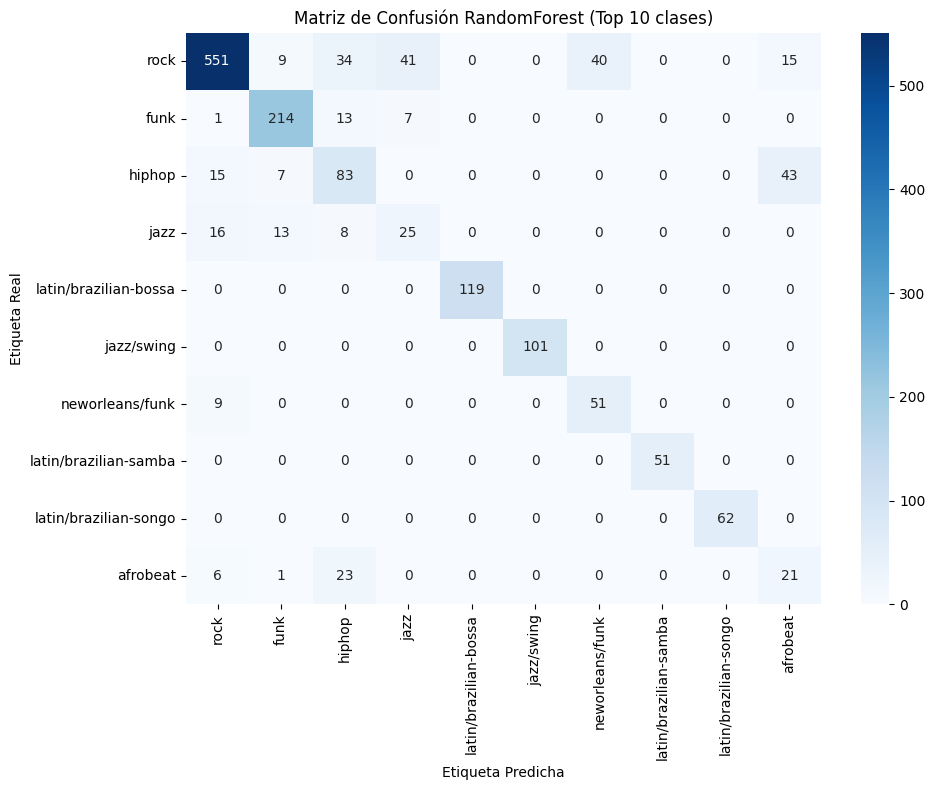

📂 Imagen guardada en: images/confusion_matrix_random_forest.png


In [ ]:
# 🚀 31g. Visualización de matriz de confusión para RandomForest

def visualizar_matriz_confusion_rf(
    y_test,
    y_pred,
    output_path='images/confusion_matrix_random_forest.png',
    top_n_classes=10
):
    """
    Genera un heatmap de la matriz de confusión (top clases más frecuentes).

    Args:
        y_test: etiquetas reales
        y_pred: etiquetas predichas
        output_path: ruta de la imagen de salida
        top_n_classes: número de clases más frecuentes a mostrar
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    import pandas as pd
    import numpy as np
    import os

    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Selección de clases más frecuentes
    labels, counts = np.unique(y_test, return_counts=True)
    top_classes = labels[np.argsort(counts)[::-1]][:top_n_classes]

    cm = confusion_matrix(y_test, y_pred, labels=top_classes)
    df_cm = pd.DataFrame(cm, index=top_classes, columns=top_classes)

    plt.figure(figsize=(10, 8))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión RandomForest (Top {top_n_classes} clases)')
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

    plt.savefig(output_path)
    plt.show()
    print(f"📂 Imagen guardada en: {output_path}")

# 💡 Ejecución
visualizar_matriz_confusion_rf(
    y_test=y_test,
    y_pred=y_pred_rf,
    output_path='images/confusion_matrix_random_forest.png',
    top_n_classes=10
)


#### 31g. Visualización matriz de confusión (RandomForestClassifier)

Se generó la matriz de confusión para las 10 clases con mayor frecuencia en el conjunto de test. A continuación, se destacan los hallazgos principales:

---

### 🎯 **Análisis de la matriz de confusión**

✅ **Clases con mejor desempeño**  
- `latin/brazilian-bossa`, `jazz/swing`, `latin/brazilian-songo` y `latin/brazilian-samba` muestran una predicción casi perfecta (altos valores en la diagonal, mínimos errores de confusión).  
- `rock` y `funk` tienen un número alto de aciertos absolutos gracias a su representación mayoritaria, aunque con errores notables hacia clases relacionadas como `hiphop` y `neworleans/funk`.

⚠️ **Clases con errores notables**  
- `hiphop` y `jazz` presentan confusión significativa con `rock`, `funk` y entre ellas.  
- `afrobeat` sigue mostrando dificultad, con confusión dispersa hacia `hiphop` y `rock`.  

📌 **Tendencia de confusión**  
- Se observa que los errores más comunes ocurren entre estilos musicales que comparten ciertas características rítmicas o culturales (ej.: `rock` ↔ `hiphop`, `funk` ↔ `neworleans/funk`).  
- El modelo RandomForest logra ligeramente mejor precisión en los casos difíciles comparado con los modelos anteriores, pero aún con margen de mejora.

---

### 📂 **Archivo generado**
✅ Imagen de la matriz de confusión guardada en: `images/confusion_matrix_random_forest.png`

---

💡 *Este análisis refuerza la necesidad de explorar modelos más complejos (ej. redes neuronales, optimización bayesiana) o estrategias adicionales (ensembles, ajuste de pesos por clase) para mejorar el rendimiento en clases minoritarias y evitar la confusión entre géneros similares.*


#### 31h. Documentación del rendimiento alcanzado y decisiones tomadas (RandomForestClassifier)

---

### 📌 **Resumen del modelo**
- **Modelo:** RandomForestClassifier
- **Número de muestras de entrenamiento:** 13,231
- **Número de clases:** 67
- **Características utilizadas:** Las seleccionadas del dataset procesado de espectrogramas Mel.

---

### ⚡ **Resultados de rendimiento**
| Métrica                  | Valor |
|--------------------------|-------|
| **CV balanced accuracy**  | 0.670 ± 0.007 |
| **Test accuracy**         | 0.693 |
| **Test balanced accuracy**| 0.643 |
| **F1 macro (test)**       | 0.642 |
| **F1 weighted (test)**    | 0.703 |

---

### 📝 **Decisiones tomadas**
- Se eligió RandomForest como un baseline más robusto respecto a modelos lineales, por su capacidad de manejar relaciones no lineales y su resistencia al overfitting moderado gracias al bagging.
- Se emplearon hiperparámetros por defecto con `random_state` y sin optimización todavía para establecer un punto de comparación.
- El modelo fue evaluado sobre el mismo split de datos para garantizar comparabilidad directa con los modelos previos.

---

### 🔍 **Observaciones clave**
- El rendimiento general mejora levemente sobre el árbol de decisión individual, especialmente en métricas balanceadas y F1 macro.
- Persisten las dificultades en clases con bajo soporte o con alta similitud rítmica/estructural, como `afrobeat`, `funk/fast`, `rock/prog`.
- Algunas clases minoritarias fueron bien predichas gracias al poder del ensamble (`latin/brazilian-songo`, `jazz/swing`, `latin/chacarera`).

---

### 💡 **Siguientes pasos sugeridos**
- Aplicar **optimización bayesiana** para hiperparámetros del RandomForest.
- Incorporar **ponderación por clase** o estrategias de reamostrado para abordar el desbalance.
- Explorar **modelos más complejos** como redes neuronales profundas (aprovechando CUDA) y ensembles híbridos.
- Realizar análisis de errores detallado por grupo de estilos para refinar el feature engineering.

---

📂 **Archivos generados:**
- Métricas: `results/metrics_random_forest.json`
- Matriz de confusión: `images/confusion_matrix_random_forest.png`
- Modelo serializado: `checkpoints/random_forest_model.joblib`
